## New Intensity Coronal File

In [1]:
# import library
import pandas as pd
import numpy as np

# to order a dictionary 
from collections import OrderedDict

# for heat map
import seaborn as sns

# for scikic learn metrices
from sklearn import metrics

# for normalization
from sklearn.preprocessing import StandardScaler

# for PCA two different packages
from sklearn.decomposition import PCA
#from pca import pca


# for plotting
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d




In [2]:
# load the file
intCoral = pd.read_csv("../NewIntC.csv")

### We see 4350 genes for this file

In [3]:
# print the head of file
intCoral.head()

,Unnamed: 0,voxRowNum,Structure-ID,X,Y,Z,Snap47-3,Nvl-5,Gtf3c2-7,Pcdh9-10,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
0,0,51174,852,53,25,18,143.63872,113.620560,115.660150,112.52112,...,120.486435,103.42090,115.137184,110.80065,129.53755,116.363390,112.752400,137.86552,130.97432,113.439835
1,1,51787,136,63,34,18,144.12184,117.451440,0.000000,129.54642,...,115.074710,101.16852,95.426210,97.81866,119.20102,106.782150,115.069310,132.43279,128.98770,100.647360
2,2,53921,852,53,25,19,146.72778,116.699684,109.643906,113.14177,...,122.069336,102.90014,116.028220,109.75160,128.90953,116.621284,113.347850,135.78090,130.15176,113.817560
3,3,53988,852,53,26,19,149.51408,116.324135,109.760550,109.97988,...,122.528786,103.69169,111.145640,109.46094,131.05000,118.576740,115.871350,133.08115,129.19650,113.749670
4,4,54466,136,62,33,19,161.75977,127.019640,107.620760,112.82336,...,125.473400,120.42542,101.881035,95.75577,115.28077,105.106780,118.627144,127.83890,126.73063,111.444336


### Removing the columns that are not needed as of now¶
### ['Unnamed: 0', 'voxRowNum', 'Structure-ID', 'X', 'Y', 'Z']

In [4]:
iCorReduc = intCoral.iloc[: ,6:]
iCorReduc

,Snap47-3,Nvl-5,Gtf3c2-7,Pcdh9-10,Ndufv3-12,Mageh1-17,Cdca7-26,Prkag2-29,Dopey2-31,Anln-33,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
0,143.63872,113.620560,115.660150,112.521120,110.400910,111.746030,148.21960,122.227940,122.398590,141.56270,...,120.486435,103.420900,115.137184,110.800650,129.537550,116.363390,112.752400,137.86552,130.97432,113.439835
1,144.12184,117.451440,0.000000,129.546420,119.135100,150.694660,167.41196,115.437035,116.000404,144.90564,...,115.074710,101.168520,95.426210,97.818660,119.201020,106.782150,115.069310,132.43279,128.98770,100.647360
2,146.72778,116.699684,109.643906,113.141770,111.085526,111.626000,152.57135,121.506740,123.955025,139.08520,...,122.069336,102.900140,116.028220,109.751600,128.909530,116.621284,113.347850,135.78090,130.15176,113.817560
3,149.51408,116.324135,109.760550,109.979880,111.667244,113.465400,158.55430,119.796480,122.784200,137.42450,...,122.528786,103.691690,111.145640,109.460940,131.050000,118.576740,115.871350,133.08115,129.19650,113.749670
4,161.75977,127.019640,107.620760,112.823360,125.316986,133.508070,162.84009,119.418190,116.547455,143.00708,...,125.473400,120.425420,101.881035,95.755770,115.280770,105.106780,118.627144,127.83890,126.73063,111.444336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,156.98790,115.934616,105.001980,113.565050,111.663580,105.720380,149.00073,119.874350,120.221270,131.67740,...,114.491390,106.421140,109.295500,104.271904,122.350290,120.826164,117.269210,132.61820,130.72693,126.842010
1461,157.06454,117.184074,106.621330,111.920270,113.440544,102.783890,153.10565,120.874664,122.705130,130.60188,...,115.028060,107.184875,110.417390,109.853035,123.926430,127.004326,116.508520,131.44614,133.14066,162.590770
1462,150.47394,114.039810,107.875010,117.649216,134.438130,114.380450,164.62670,117.179504,124.215010,143.76874,...,124.485810,117.329160,104.724160,102.804110,120.749520,106.488950,109.575874,131.34045,130.20566,116.088660
1463,152.91632,116.503420,106.053320,113.973880,111.315580,105.546585,142.40953,119.860430,118.533290,134.59569,...,116.256440,108.664180,110.534310,108.282390,119.646350,119.194595,119.045715,130.43960,130.86887,125.730690


In [5]:
print("Total number of Genes::{}".format(len(iCorReduc.columns)))
print("Total number of voxels::{}".format(len(intCoral['voxRowNum'].unique())))   # total number of unique voxels
print("Unique Stucture Ids::{}".format(intCoral['Structure-ID'].unique()))        # print the unique structure ids

Total number of Genes::4344
Total number of voxels::1465
Unique Stucture Ids::[ 852  136 1098  661  978 1107 1048  939  143  307  970  773  235]


In [6]:
iCorReduc.describe()

,Snap47-3,Nvl-5,Gtf3c2-7,Pcdh9-10,Ndufv3-12,Mageh1-17,Cdca7-26,Prkag2-29,Dopey2-31,Anln-33,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,...,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,157.549651,119.131082,104.115983,117.736959,116.369911,110.725659,154.282738,120.791150,115.011641,133.272435,...,119.064219,118.046630,110.606417,111.202468,121.551280,112.780478,112.246803,132.101220,134.759427,110.574767
std,7.850952,4.682902,35.167940,11.911268,14.693332,9.439681,16.716751,5.684998,35.021625,14.613393,...,4.296521,7.100562,13.230679,9.322532,6.929027,6.151829,11.368392,6.572837,3.450967,10.739161
min,137.323380,102.954240,0.000000,103.774940,0.000000,100.974360,0.000000,111.974940,0.000000,0.000000,...,106.067290,97.759290,85.114970,95.755770,105.404110,97.419150,86.852270,123.791420,125.835280,88.625200
25%,152.053380,115.980290,106.937890,110.319170,112.005360,106.123240,151.563420,117.105810,119.971375,130.658870,...,115.987390,112.604230,103.176765,106.071270,116.290450,108.654810,106.063576,128.326110,132.386760,104.155250
50%,157.402370,118.316430,109.753280,113.600770,114.375084,108.134476,155.162000,119.437930,124.290210,133.997600,...,118.835550,116.515510,109.140530,109.854400,120.760740,112.907310,110.935900,130.555340,134.614060,108.856766
75%,163.201720,121.294730,115.643940,121.175770,119.372630,111.559395,159.622380,122.586650,128.570510,138.374080,...,122.076470,123.105260,114.471880,113.538850,126.203640,116.729750,116.099655,133.707930,137.058990,114.526375
max,183.976520,136.122880,175.438600,185.582780,159.627900,177.670400,175.044100,150.970930,158.475900,153.004490,...,141.655490,143.295560,186.259540,182.162370,152.460850,134.163450,179.950850,180.596740,144.117780,180.889850


### There are 12 same genes that has 0 as value for all the voxels

In [7]:
colsWithZero = iCorReduc.columns[iCorReduc.eq(0).all()] # in this data set 0 is null
colsWithZero

Index(['Col6a1-290', 'Prkcz-841', 'Sst-1001', 'Ywhag-1124', 'Adrm1-2019',
       'Crat-2119', 'Fbln1-2205', 'Ndufs1-2421', 'Traf7-2527', 'Pim2-32583',
       'Limk2-61002', 'Bcap29-104826'],
      dtype='object')

In [8]:
# remove the null columns
iCorReduc.drop(columns=colsWithZero,inplace=True)
iCorReduc.head()

,Snap47-3,Nvl-5,Gtf3c2-7,Pcdh9-10,Ndufv3-12,Mageh1-17,Cdca7-26,Prkag2-29,Dopey2-31,Anln-33,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
0,143.63872,113.620560,115.660150,112.52112,110.400910,111.74603,148.21960,122.227940,122.398590,141.56270,...,120.486435,103.42090,115.137184,110.80065,129.53755,116.363390,112.752400,137.86552,130.97432,113.439835
1,144.12184,117.451440,0.000000,129.54642,119.135100,150.69466,167.41196,115.437035,116.000404,144.90564,...,115.074710,101.16852,95.426210,97.81866,119.20102,106.782150,115.069310,132.43279,128.98770,100.647360
2,146.72778,116.699684,109.643906,113.14177,111.085526,111.62600,152.57135,121.506740,123.955025,139.08520,...,122.069336,102.90014,116.028220,109.75160,128.90953,116.621284,113.347850,135.78090,130.15176,113.817560
3,149.51408,116.324135,109.760550,109.97988,111.667244,113.46540,158.55430,119.796480,122.784200,137.42450,...,122.528786,103.69169,111.145640,109.46094,131.05000,118.576740,115.871350,133.08115,129.19650,113.749670
4,161.75977,127.019640,107.620760,112.82336,125.316986,133.50807,162.84009,119.418190,116.547455,143.00708,...,125.473400,120.42542,101.881035,95.75577,115.28077,105.106780,118.627144,127.83890,126.73063,111.444336


### Genes having total no of 0's

In [9]:
# get the column names
# and create a dictionary with columns having total 0
columnNames = list(iCorReduc.columns.values)
# dictionary to contain genes that has atleast 1 0
colSumNull = {} 
# dictionary to contain all genes with total no of 0's
colSumNullAll = {}

# loop to populate the dictionary
for col in columnNames:
    cTot = iCorReduc[col].eq(0).sum()
    colSumNullAll[col] = cTot
    if cTot > 0:
        colSumNull[col] = cTot

# transform to a dataframe to print better
#new = pd.DataFrame.from_dict(colSumNull, orient = 'index')
new = pd.DataFrame(colSumNull, index=[0])
new.index = ['TotalNoOf-0']
new

,Gtf3c2-7,Ndufv3-12,Cdca7-26,Dopey2-31,Anln-33,Hepacam-35,Setd5-37,Cnih3-39,Thap1-44,9130024F11Rik-51,...,B3gnt2-75988600,Thbs4-77874596,Traip-77887842,Ctgf-79556634,Zbtb20-79568020,Hcrtr2-80517329,Creb3l1-112197858,Nr1h3-112205214,Cd6-112205643,Mdfi-112648831
TotalNoOf-0,136,15,15,121,15,15,687,306,15,15,...,15,131,1,8,108,1,15,47,346,21


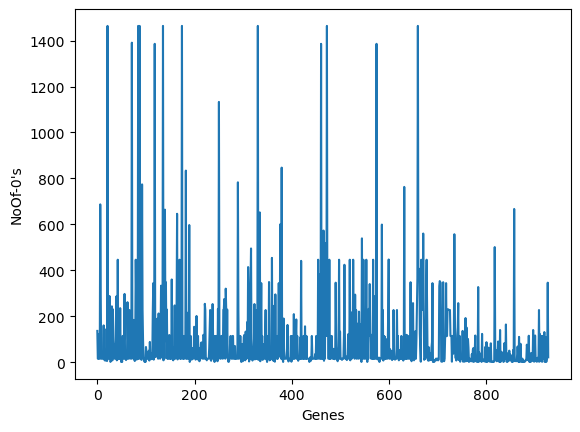

In [10]:
rows = list(range(928))

plt.xlabel('Genes')
plt.ylabel('NoOf-0\'s')
plt.plot(rows, colSumNull.values())

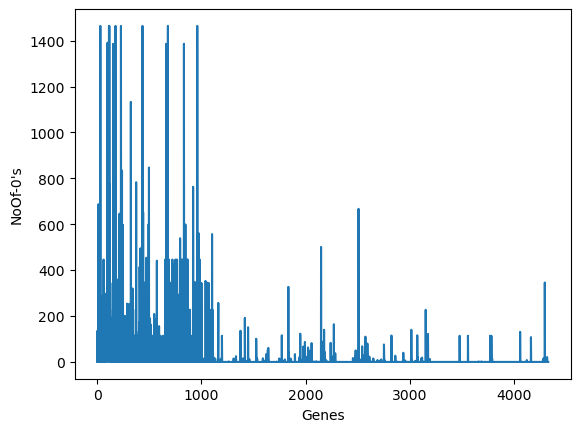

In [11]:
rows = list(range(4332))

plt.xlabel('Genes')
plt.ylabel('NoOf-0\'s')
plt.plot(rows, colSumNullAll.values())

In [12]:
# get all the values from the initial dictionary
ls = colSumNull.values()

# get the list of unique value of no.of 0's
unique_list = pd.Series(ls).drop_duplicates().tolist()

# create a new dictionary to hold
# column names for each no.of 0's
simCols = {}

# loop through the unique list and gett all column names 
# from the dictionary and store it in the new dictionary
for num in unique_list:
    names = [k for k,v in colSumNull.items() if v == num]
    simCols[num] = names

In [13]:
# display an ordered dictionary
ordDic = OrderedDict(sorted(simCols.items()))
# 10 group of genes which has the max number of -1's
els = list(ordDic.items())
els[-10:]

[(687, ['Setd5-37']),
 (763, ['Aurka-2643']),
 (774, ['Extl3-411']),
 (783, ['Nr1d2-1245']),
 (834, ['Pkia-805']),
 (847, ['Plxnb1-1561']),
 (1133, ['Vamp2-1092']),
 (1386, ['Hars-554', 'Snhg7-1968', 'Nfkbie-2425']),
 (1391, ['Dbh-326']),
 (1464,
  ['Adcy9-83',
   'Erdr1-378',
   'Enc1-390',
   'L1cam-620',
   'Pcsk1n-777',
   'Pex14-1397',
   'Ankrd33-2006',
   'Mapk3-32576'])]

### Remove all the genes that has at least 1 (0) 

In [14]:
# get a copy of the data
iCorClean = iCorReduc.copy()

# drop the columns having -1's
# the dataframe new has all the columns having atleast 1 0
iCorClean.drop(columns=new.columns,inplace=True)

In [15]:
iCorClean.describe()

,Snap47-3,Nvl-5,Pcdh9-10,Mageh1-17,Prkag2-29,Mansc1-53,Actc1-62,Adcy6-81,Agt-87,Mllt11-89,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,...,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,157.549651,119.131082,117.736959,110.725659,120.791150,160.678568,140.096966,114.358225,125.182144,143.599678,...,119.064219,118.046630,110.606417,111.202468,121.551280,112.780478,112.246803,132.101220,134.759427,110.574767
std,7.850952,4.682902,11.911268,9.439681,5.684998,6.510215,7.204416,9.432996,9.213158,8.695277,...,4.296521,7.100562,13.230679,9.322532,6.929027,6.151829,11.368392,6.572837,3.450967,10.739161
min,137.323380,102.954240,103.774940,100.974360,111.974940,144.255630,124.836910,89.186420,106.174400,128.408500,...,106.067290,97.759290,85.114970,95.755770,105.404110,97.419150,86.852270,123.791420,125.835280,88.625200
25%,152.053380,115.980290,110.319170,106.123240,117.105810,155.768700,134.770500,108.687710,117.872300,137.853420,...,115.987390,112.604230,103.176765,106.071270,116.290450,108.654810,106.063576,128.326110,132.386760,104.155250
50%,157.402370,118.316430,113.600770,108.134476,119.437930,159.603180,139.354520,111.348590,124.056440,142.222090,...,118.835550,116.515510,109.140530,109.854400,120.760740,112.907310,110.935900,130.555340,134.614060,108.856766
75%,163.201720,121.294730,121.175770,111.559395,122.586650,165.093110,143.803770,116.026220,131.614490,147.377500,...,122.076470,123.105260,114.471880,113.538850,126.203640,116.729750,116.099655,133.707930,137.058990,114.526375
max,183.976520,136.122880,185.582780,177.670400,150.970930,185.993000,166.295430,163.258360,166.057140,179.645070,...,141.655490,143.295560,186.259540,182.162370,152.460850,134.163450,179.950850,180.596740,144.117780,180.889850


In [16]:
iCorClean.to_csv('IntCorGeneExcNull.csv', index= False)

### After cleaning the 0's we are left with the same 1465 voxels and 3404 genes as feature.

In [17]:
print("Total number of Rows::{}".format(len(iCorClean.index))) 
print("Total number of genes::{}".format(len(iCorClean.columns)))

Total number of Rows::1465
Total number of genes::3404


In [18]:
iCorClean.describe()

,Snap47-3,Nvl-5,Pcdh9-10,Mageh1-17,Prkag2-29,Mansc1-53,Actc1-62,Adcy6-81,Agt-87,Mllt11-89,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,...,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,157.549651,119.131082,117.736959,110.725659,120.791150,160.678568,140.096966,114.358225,125.182144,143.599678,...,119.064219,118.046630,110.606417,111.202468,121.551280,112.780478,112.246803,132.101220,134.759427,110.574767
std,7.850952,4.682902,11.911268,9.439681,5.684998,6.510215,7.204416,9.432996,9.213158,8.695277,...,4.296521,7.100562,13.230679,9.322532,6.929027,6.151829,11.368392,6.572837,3.450967,10.739161
min,137.323380,102.954240,103.774940,100.974360,111.974940,144.255630,124.836910,89.186420,106.174400,128.408500,...,106.067290,97.759290,85.114970,95.755770,105.404110,97.419150,86.852270,123.791420,125.835280,88.625200
25%,152.053380,115.980290,110.319170,106.123240,117.105810,155.768700,134.770500,108.687710,117.872300,137.853420,...,115.987390,112.604230,103.176765,106.071270,116.290450,108.654810,106.063576,128.326110,132.386760,104.155250
50%,157.402370,118.316430,113.600770,108.134476,119.437930,159.603180,139.354520,111.348590,124.056440,142.222090,...,118.835550,116.515510,109.140530,109.854400,120.760740,112.907310,110.935900,130.555340,134.614060,108.856766
75%,163.201720,121.294730,121.175770,111.559395,122.586650,165.093110,143.803770,116.026220,131.614490,147.377500,...,122.076470,123.105260,114.471880,113.538850,126.203640,116.729750,116.099655,133.707930,137.058990,114.526375
max,183.976520,136.122880,185.582780,177.670400,150.970930,185.993000,166.295430,163.258360,166.057140,179.645070,...,141.655490,143.295560,186.259540,182.162370,152.460850,134.163450,179.950850,180.596740,144.117780,180.889850


### Normalize the data before PCA

In [19]:
# create a stanadard scaler object
sc = StandardScaler()
# copy the cleaned data 
iCorNorm = iCorClean.copy()

# Z- score Normalization
normData = sc.fit_transform(iCorNorm)  
# convert the normalized data to data frame
iCor = pd.DataFrame(normData, columns= sc.get_feature_names_out())

In [20]:
print("Shape of deNorm data:: {}".format(iCorNorm.shape))
print("Shape of norm ndArray:: {}".format(normData.shape))
iCor.head()

Shape of deNorm data:: (1465, 3404)
Shape of norm ndArray:: (1465, 3404)


,Snap47-3,Nvl-5,Pcdh9-10,Mageh1-17,Prkag2-29,Mansc1-53,Actc1-62,Adcy6-81,Agt-87,Mllt11-89,...,Med23-112649261,Dvl2-112649476,Gpr35-112649690,Hnrnph2-112649906,Ebpl-112650122,Drd4-112650336,Dhrs3-112650553,Pla2g16-112650769,S1pr5-112651200,Thbs4-112651416
0,-1.772483,-1.177134,-0.438041,0.108131,0.252820,-1.057602,-0.564635,-0.517260,-1.111622,-0.465248,...,0.331129,-2.060502,0.342561,-0.043117,1.152975,0.582613,0.044489,0.877288,-1.097200,0.266878
1,-1.710926,-0.358798,0.991791,4.235593,-0.942119,1.913429,0.555634,-0.328591,1.856411,-0.814161,...,-0.928861,-2.377822,-1.147741,-1.436131,-0.339306,-0.975381,0.248362,0.050463,-1.673067,-0.924727
2,-1.378886,-0.519385,-0.385917,0.095411,0.125916,-1.269277,-0.578813,-0.232333,-1.040135,-0.106516,...,0.699669,-2.133868,0.409930,-0.155683,1.062308,0.624549,0.096885,0.560023,-1.335637,0.302063
3,-1.023865,-0.599608,-0.651461,0.290336,-0.175024,-1.169250,-0.344735,-0.304890,-1.368196,-0.040590,...,0.806641,-2.022353,0.040769,-0.186872,1.371327,0.942523,0.318936,0.149139,-1.612541,0.295739
4,0.536439,1.685120,-0.412658,2.414297,-0.241588,2.027530,1.337036,-0.808856,1.589884,0.216207,...,1.492223,0.335129,-0.659706,-1.657487,-0.905272,-1.247811,0.561427,-0.648696,-2.327330,0.080999


In [21]:
# get a model for components explaining 95% of variance 
model = PCA(n_components = 0.95)

# fit transform the data
pca_PC = model.fit_transform(iCor)

# variance explained by components
variance = model.explained_variance_ratio_
cum_var = np.cumsum(variance)

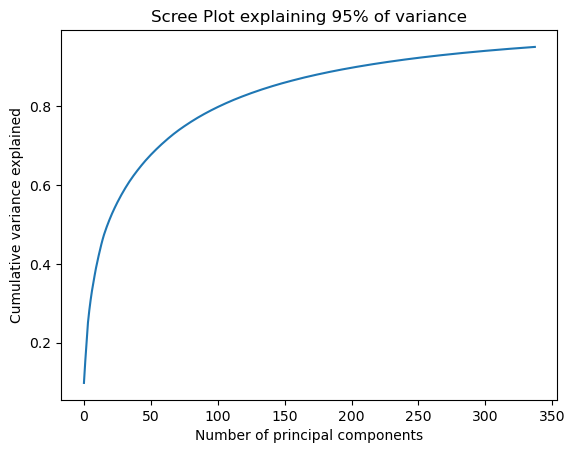

In [22]:
# Generate a scree plot
plt.title("Scree Plot explaining 95% of variance")
plt.plot(cum_var)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

#### 95% of variance is explained by 338 PCs
#### 61% of variance is explained by 35 PCs
#### 50% of variance is explained by 19 PCs

In [23]:
variance

array([0.0978628 , 0.05562374, 0.05039394, 0.04696298, 0.0311131 ,
       0.02652061, 0.02316081, 0.02039059, 0.01887956, 0.01840952,
       0.01594497, 0.01556878, 0.01486699, 0.01372396, 0.01282721,
       0.01169859, 0.01010981, 0.00953436, 0.00909617, 0.00856383,
       0.00817925, 0.00803866, 0.00751109, 0.00719688, 0.0070808 ,
       0.00676593, 0.00654905, 0.00639473, 0.00619995, 0.00598505,
       0.00582652, 0.00571667, 0.0054507 , 0.00539915, 0.00528481,
       0.00500548, 0.00487698, 0.00474544, 0.00462902, 0.00454844,
       0.00437031, 0.00434518, 0.00430857, 0.00414457, 0.00409563,
       0.00402419, 0.00393471, 0.00379666, 0.0037744 , 0.00366113,
       0.00358039, 0.00348374, 0.00345227, 0.0034059 , 0.00333603,
       0.00327561, 0.00323717, 0.00317692, 0.00315348, 0.00305813,
       0.00303643, 0.00300262, 0.00295984, 0.00289067, 0.00286242,
       0.00280722, 0.00279049, 0.0026948 , 0.00262551, 0.00259955,
       0.00253918, 0.002504  , 0.00243277, 0.00240144, 0.00234

In [24]:
len(cum_var)

338

In [25]:
cum_var[:36]

array([0.0978628 , 0.15348654, 0.20388047, 0.25084345, 0.28195654,
       0.30847715, 0.33163797, 0.35202855, 0.37090811, 0.38931763,
       0.4052626 , 0.42083138, 0.43569837, 0.44942233, 0.46224954,
       0.47394813, 0.48405794, 0.4935923 , 0.50268847, 0.5112523 ,
       0.51943155, 0.52747021, 0.5349813 , 0.54217818, 0.54925897,
       0.5560249 , 0.56257395, 0.56896867, 0.57516862, 0.58115367,
       0.58698019, 0.59269686, 0.59814756, 0.60354671, 0.60883152,
       0.613837  ])

In [26]:
# shapeMatrix = iCor.copy()

# pca = PCA(shapeMatrix.shape[0]-1)
# pca.fit(shapeMatrix)
# transformedShapeMatrix = pca.transform(shapeMatrix)

# random_eigenvalues = np.zeros(shapeMatrix.shape[0]-1)
# for i in range(100):
#     random_shapeMatrix = pd.DataFrame(np.random.normal(0, 1, [shapeMatrix.shape[0], shapeMatrix.shape[1]]))
#     pca_random = PCA(shapeMatrix.shape[0]-1)
#     pca_random.fit(random_shapeMatrix)
#     transformedRandomShapeMatrix = pca_random.transform(random_shapeMatrix)
#     random_eigenvalues = random_eigenvalues+pca_random.explained_variance_ratio_
# random_eigenvalues = random_eigenvalues / 100


# plt.plot(pca.explained_variance_ratio_, '--bo', label='pca-data')
# plt.plot(random_eigenvalues, '--r', label='pca-Simulated')
# plt.legend()
# plt.title('parallel analysis plot')
# plt.show()

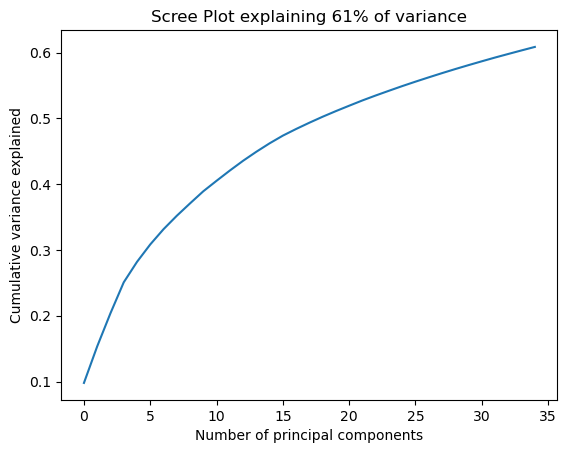

In [27]:
# plot 35 components
plt.title("Scree Plot explaining 61% of variance")
plt.plot(cum_var[:35])
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

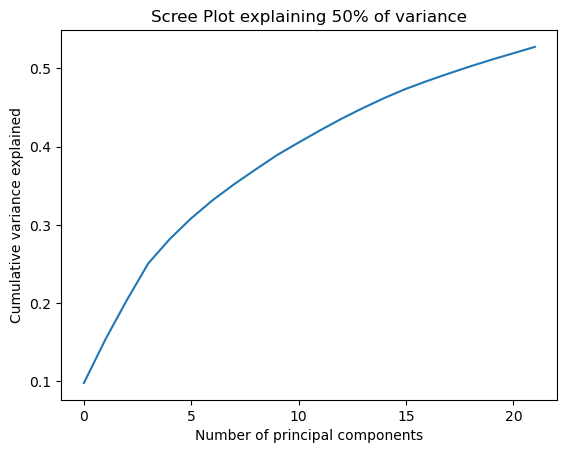

In [28]:
# plot 19 components
plt.title("Scree Plot explaining 50% of variance")
plt.plot(cum_var[:22])
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

### Create a dataframe having components and feataurs with the loading values

In [29]:
col = []
for i in range(1,36,1):
    col.append('PC'+str(i))
    
loadings = pd.DataFrame(model.components_[:35].T, columns=col, index=iCor.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
Snap47-3,0.031207,-0.024947,-0.003225,0.006179,0.002061,-0.040908,0.011722,-0.011668,0.023502,0.021057,...,-0.010125,-0.001781,-0.028373,-0.008554,-0.009425,-0.026319,0.009173,0.005349,-0.004571,-0.006470
Nvl-5,-0.000773,-0.008938,0.007668,-0.031918,-0.012746,0.003973,0.023967,-0.024708,0.025869,-0.004901,...,0.042802,-0.000459,-0.010759,0.000706,-0.004322,-0.011614,0.022570,-0.000702,0.009387,-0.018573
Pcdh9-10,0.030910,-0.021683,0.030670,-0.012288,0.021468,0.014992,-0.019107,-0.001596,0.007960,0.020715,...,0.016106,0.013789,0.010294,-0.007328,-0.019065,-0.001447,0.006704,0.007501,-0.013681,-0.024683
Mageh1-17,-0.016231,0.000470,0.026147,0.018564,0.004772,0.014297,-0.011143,0.007250,-0.011612,-0.005751,...,-0.006622,-0.015101,0.006924,0.024246,-0.016635,0.010458,-0.008539,-0.035981,-0.011249,-0.022047
Prkag2-29,0.009580,0.014009,0.000911,0.001988,-0.004659,-0.012047,0.008659,-0.012218,-0.017170,0.014619,...,-0.014940,-0.037414,0.018791,-0.015598,-0.002238,-0.001743,0.008122,-0.009729,-0.009268,0.020620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Drd4-112650336,0.026353,-0.001424,-0.034051,-0.021064,0.020585,-0.014735,0.009228,-0.017660,0.019833,-0.015500,...,-0.020001,-0.004086,0.015952,0.003600,0.003150,-0.000827,0.018221,0.014032,-0.004883,-0.014719
Dhrs3-112650553,-0.009870,0.036170,0.008936,-0.004274,0.015675,0.002821,0.013098,-0.006310,0.005246,-0.009020,...,0.007634,0.007822,-0.006703,0.017555,-0.036828,-0.009048,0.014069,-0.018092,0.003517,-0.016738
Pla2g16-112650769,-0.004061,0.023756,0.003620,-0.044704,0.020451,0.002904,0.014440,0.005417,0.014344,-0.024863,...,-0.003563,-0.009741,-0.001307,0.015853,-0.002875,-0.007468,-0.006064,-0.005180,-0.002331,-0.000909
S1pr5-112651200,0.009396,-0.007965,-0.045452,-0.014620,-0.021991,0.027749,-0.022181,0.015237,0.011512,-0.008193,...,-0.000029,-0.022682,-0.008567,-0.003462,-0.009122,-0.003585,0.006206,-0.003535,-0.014334,-0.009694


In [30]:
# 2D plot of PC's
# x = loadings['PC1']
# y = loadings['PC2']
# fig = plt.figure()
# plt.rcParams.update(plt.rcParamsDefault)
# #plt.rcParams["figure.figsize"] = [6, 5]
# #plt.rcParams["figure.autolayout"] = True
# #plt.scatter(x, y, c = x, cmap='BrBG_r')
# plt.scatter(x, y)
# plt.xlabel('PC1 ' + str(round(pca.explained_variance_ratio_[0]*100, 2)) + ' Expl Var')
# plt.ylabel('PC2 ' + str(round(pca.explained_variance_ratio_[1]*100, 2)) + ' Expl Var')
# plt.title("Intensity 2D scatter plot of loadings of PC's")
# # colbar = plt.colorbar()
# # colbar.set_label('PC1')
# plt.show()

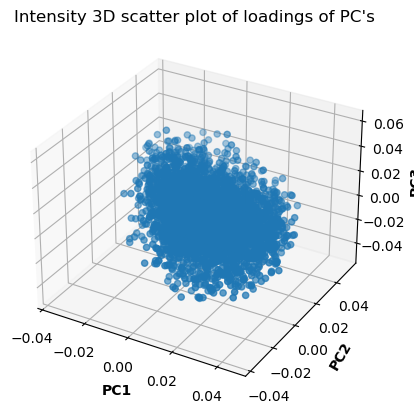

In [32]:
from matplotlib.colors import ListedColormap
# 3D plot of PC's

x = loadings['PC1']
y = loadings['PC2']
z = loadings['PC3']
fig = plt.figure()
#plt.rcParams["figure.figsize"] = [5, 7]
#plt.rcParams["figure.autolayout"] = True
ax = plt.axes(projection='3d')

#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

#plotDS = ax.scatter3D(x, y, z, c=x, cmap='BrBG_r') # c = x, cmap = cmap, alpha=1
plotDS = ax.scatter3D(x, y, z) # c = x, cmap = cmap, alpha=1

plt.title("Intensity 3D scatter plot of loadings of PC's")

ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold', rotation = 60)
ax.set_zlabel('PC3', fontweight ='bold', rotation = 90)
#colbar = fig.colorbar(plotDS, ax = ax, shrink = 0.2, aspect = 20 )
#colbar.set_label('PC1')

# show plot
plt.show()
#plt.rcParams.update(plt.rcParamsDefault)

In [33]:
plt.rcParams.update(plt.rcParamsDefault) # reset the plot parameters

In [34]:
# dataframe to hold no of genes remaining at different cutoff for each PC's
cutOffData = pd.DataFrame(columns=['0.01', '0.02', '0.03', '0.04', '0.05', '0.06'], 
                          index= loadings.columns)
cutoff = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]


for col in loadings.columns:
    #val = abs((loadings)).sort_values(by = col, ascending = False)[col]
    val = abs((loadings))[col]
    gCount = []
    for cut in cutoff:
        gCount.append(sum(val > cut))
    
    # Add the new row to the DataFrame
    cutOffData.loc[col] = gCount

print(cutOffData)

      0.01 0.02 0.03 0.04 0.05 0.06
PC1   1951  905  295   27    0    0
PC2   1799  822  324   69    3    0
PC3   1884  831  292   68    8    1
PC4   1926  808  273   71   12    1
PC5   1886  831  274   71   15    0
PC6   1905  827  272   67    6    0
PC7   1943  864  275   62    4    0
PC8   1845  796  285   76   15    3
PC9   1867  818  265   75   16    3
PC10  1804  761  279   89   28    7
PC11  1773  774  268   85   31    7
PC12  1810  755  296   87   21    3
PC13  1850  817  288   74   12    0
PC14  1883  805  267   76   18    3
PC15  1906  842  293   65    6    0
PC16  1839  781  275   88   23    4
PC17  1859  792  270   83   24    2
PC18  1795  798  289   89   15    5
PC19  1863  785  269   80   24    4
PC20  1868  815  267   73   14    3
PC21  1840  797  275   82   20    4
PC22  1853  781  269   86   20    4
PC23  1846  777  281   88   18    5
PC24  1865  795  287   80   19    3
PC25  1872  834  289   62   15    4
PC26  1819  796  269   84   16    7
PC27  1866  830  268   64   

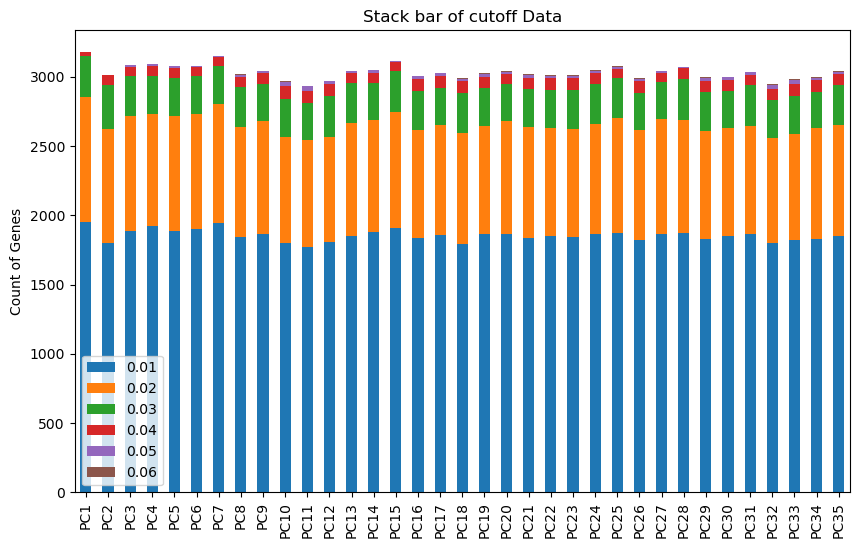

In [35]:
cutOffData.plot(kind = 'bar' , stacked = True, figsize = (10,6))
plt.title('Stack bar of cutoff Data')
plt.ylabel('Count of Genes')
plt.show()

### gene names in a dictionary for each PC at cutoff as input parameter

In [36]:
# get the gene names for each PC's at x cutoff
def geneAtCutOff(x):
    unqGn = {}
    cut = x
    for col in loadings.columns:
        unqGn[col] = loadings[abs((loadings))[col] > x][col].index.tolist()
    return unqGn

In [37]:
loadings[abs((loadings))['PC1'] > 0.04]['PC1'].index.tolist()

['Gpr85-1738',
 'Cd200-71358579',
 'Tmem108-71358589',
 'Sobp-71920521',
 'Lgi3-73520996',
 'Setd3-74047910',
 'Fasn-74425543',
 'Dnm3-74641219',
 'Csnk1a1-74658110',
 'P4hb-74658245',
 'Phyh-74800914',
 'Ppp2r5b-74819327',
 'Stmn2-74819695',
 'Creg2-74882195',
 'Tmx4-74882217',
 'Mfn2-74882657',
 'Rpl15-74882810',
 'Usp22-74957911',
 'Vdac1-74957912',
 'Dpp6-75077203',
 '9530085C10Rik*-75080269',
 'Tmem246-75774671',
 'Capns1-75934915',
 'Fdps-76085745',
 'B3gnt1-77332102',
 'Pfkp-79490112',
 'Clu-79490114']

### Function to get unique no of gene for each PC not present in any other PC's

In [38]:
# Function to get uqnique gene at a cutoff for PC's
def unqGeneAtCutOff(x):
    
    total = 0;
    for c in loadings.loc[:,:]:
    
        gene = loadings.loc[(abs(loadings[c])) > x].index
        #print("length of gene at {} is {}".format(c, len(gene)))

        for col in loadings.loc[:,:]:
            if col == c:
                continue
            cGene = loadings.loc[(abs(loadings[col])) > x].index
            gene = gene.difference(cGene)
            
        print('{} \t {}'.format(c,len(gene)))
        total = total + len(gene)
    
    print("Total unique Gene::: {}".format(total))

In [39]:
unqGeneAtCutOff(0.04)

PC1 	 24
PC2 	 56
PC3 	 56
PC4 	 53
PC5 	 51
PC6 	 37
PC7 	 31
PC8 	 39
PC9 	 39
PC10 	 53
PC11 	 52
PC12 	 42
PC13 	 38
PC14 	 43
PC15 	 33
PC16 	 28
PC17 	 31
PC18 	 32
PC19 	 40
PC20 	 23
PC21 	 26
PC22 	 41
PC23 	 35
PC24 	 29
PC25 	 18
PC26 	 31
PC27 	 24
PC28 	 25
PC29 	 29
PC30 	 39
PC31 	 26
PC32 	 25
PC33 	 39
PC34 	 32
PC35 	 33
Total unique Gene::: 1253


In [40]:
cutOffData['0.04']

PC1     27
PC2     69
PC3     68
PC4     71
PC5     71
PC6     67
PC7     62
PC8     76
PC9     75
PC10    89
PC11    85
PC12    87
PC13    74
PC14    76
PC15    65
PC16    88
PC17    83
PC18    89
PC19    80
PC20    73
PC21    82
PC22    86
PC23    88
PC24    80
PC25    62
PC26    84
PC27    64
PC28    78
PC29    83
PC30    81
PC31    74
PC32    83
PC33    85
PC34    84
PC35    80
Name: 0.04, dtype: object

### Important Features for PC's Based on Loadings

In [41]:
# create a dataframe to have the important features
impFetPC_df = pd.DataFrame(columns=['PC', 'ImpFeature', 'Loading',])

# loop through the columns to create a dataframe of important features
for col in loadings.columns:
    # get the feature name having max impact
    fet = abs(loadings[col]).idxmax()
    # get the loadings value
    load = loadings.loc[fet, col]
    
    # create the datafame
    df = pd.DataFrame({'PC': [col],
                        'ImpFeature': [fet],
                        'Loading': [load]})
    
    # concat the data to the dataframe
    impFetPC_df = pd.concat([impFetPC_df, df], ignore_index=True)
                            
print(impFetPC_df)

      PC          ImpFeature   Loading
0    PC1       Fasn-74425543  0.046301
1    PC2       Ogfr-67809268  0.052808
2    PC3          Gm953-2419  0.060399
3    PC4       Asb8-77414921 -0.065093
4    PC5    Laptm4b-75651225 -0.057536
5    PC6    Galnt13-72472803  0.056591
6    PC7       Napb-75651234 -0.057298
7    PC8     Vwa5b2-73636029  0.062968
8    PC9     Adarb1-73636040  0.068278
9   PC10      Gpnmb-74581367 -0.078569
10  PC11  LOC433311-74988757  0.075694
11  PC12     Avpr1b-79488955 -0.067175
12  PC13       Heg1-74958616  0.053600
13  PC14       Scd3-74882915 -0.090416
14  PC15    Mtap7d2-74272052  0.059086
15  PC16      Npsr1-70560288  0.075911
16  PC17         Crabp1-1179  0.063952
17  PC18      Anxa2-70928384 -0.072148
18  PC19    Cacna1g-71587822  0.070943
19  PC20    Tmem159-76135828 -0.069461
20  PC21       Fat4-74363356 -0.070516
21  PC22       Mafb-73771240 -0.077290
22  PC23      Defb1-73718051  0.068765
23  PC24      Nsun7-77332090  0.070840
24  PC25       Fat3-73992

### Distinct No of Genes at different cuttoff level

In [42]:
gene02 = loadings.loc[(abs(loadings['PC1'])) > 0.02].index
gene03 = loadings.loc[(abs(loadings['PC1'])) > 0.03].index
gene04 = loadings.loc[(abs(loadings['PC1'])) > 0.04].index
gene05 = loadings.loc[(abs(loadings['PC1'])) > 0.05].index
gene06 = loadings.loc[(abs(loadings['PC1'])) > 0.06].index

for col in loadings.columns[1:]:
    
    gen2 = loadings.loc[(abs(loadings[col])) > 0.02].index
    gen3 = loadings.loc[(abs(loadings[col])) > 0.03].index
    gen4 = loadings.loc[(abs(loadings[col])) > 0.04].index
    gen5 = loadings.loc[(abs(loadings[col])) > 0.05].index
    gen6 = loadings.loc[(abs(loadings[col])) > 0.06].index
    
    # print("{} Before union:::{}".format(col,len(gene05)))
    # print("Length of gene for {} is {}".format(col, len(gen5)))
    gene02 = gene02.union(gen2)
    gene03 = gene03.union(gen3)
    gene04 = gene04.union(gen4)
    gene05 = gene05.union(gen5)
    gene06 = gene06.union(gen6)
    # print("{} After union:::{}".format(col,len(gene05)))
     
print('Unique No of Genes at cutoff 0.02 for all PC\'s::{}'.format(len(gene02)))
print('Unique No of Genes at cutoff 0.03 for all PC\'s::{}'.format(len(gene03)))
print('Unique No of Genes at cutoff 0.04 for all PC\'s::{}'.format(len(gene04)))
print('Unique No of Genes at cutoff 0.05 for all PC\'s::{}'.format(len(gene05)))
print('Unique No of Genes at cutoff 0.06 for all PC\'s::{}'.format(len(gene06)))

Unique No of Genes at cutoff 0.02 for all PC's::3404
Unique No of Genes at cutoff 0.03 for all PC's::3294
Unique No of Genes at cutoff 0.04 for all PC's::1871
Unique No of Genes at cutoff 0.05 for all PC's::533
Unique No of Genes at cutoff 0.06 for all PC's::107


In [43]:
gene04 # gene names at 0.04 cutoff

Index(['0610007P14Rik-70927828', '0610010O12Rik-75079788',
       '1110007C09Rik-74357561', '1110008P14Rik-71015816',
       '1200011I18Rik-77414569', '1600021P15Rik-71924290',
       '1700019N12Rik-73718050', '1810041L15Rik-72340125',
       '2010106G01Rik-1647', '2010111I01Rik-71717630',
       ...
       'Zfyve28-75934919', 'Zfyve9-73521827', 'Zic1-72103843',
       'Zkscan16-74750043', 'Zmiz1-74988259', 'Zmym2-73925714',
       'Zmynd11-70743906', 'Znrf1-74581382', 'Zscan22-247974',
       'Zswim6-75146003'],
      dtype='object', length=1871)

In [44]:
with open('ICorUniqueGenesCutoff0.04.txt', 'w') as file:
    # Iterate through the list and write each element to the file
    for item in gene04:
        file.write(str(item) + '\n')

### dataframe having actual intensity data for the above genes 0.04

In [45]:
# Function to get a dataFrame at a cutoff 
# input is names of Gene object ex: gene05, gene06 from above computation
def dataFrameAtCutOff(gn):
    cutOffGene = iCorReduc.copy()
    cutOffGene = cutOffGene[gn]
    cutOffGene['Structure-ID'] = intCoral['Structure-ID']
    return cutOffGene

cutOffGene04 = dataFrameAtCutOff(gene04) # create a dataframe using genenames at given cutoff
cutOffGene04

,0610007P14Rik-70927828,0610010O12Rik-75079788,1110007C09Rik-74357561,1110008P14Rik-71015816,1200011I18Rik-77414569,1600021P15Rik-71924290,1700019N12Rik-73718050,1810041L15Rik-72340125,2010106G01Rik-1647,2010111I01Rik-71717630,...,Zfyve9-73521827,Zic1-72103843,Zkscan16-74750043,Zmiz1-74988259,Zmym2-73925714,Zmynd11-70743906,Znrf1-74581382,Zscan22-247974,Zswim6-75146003,Structure-ID
0,136.86050,161.365050,133.49582,169.21384,122.247080,130.57730,134.98912,132.967030,120.263650,131.45830,...,143.02856,161.95212,133.18997,142.31412,140.49483,143.59870,149.92497,169.82031,110.245580,852
1,138.49615,121.958250,127.22372,159.12602,100.176025,137.06459,142.83790,120.580480,114.654520,131.39886,...,144.12337,134.56710,141.85979,140.41324,140.90004,142.02432,155.40448,149.51498,108.630870,136
2,138.86436,138.339520,139.10368,177.42427,111.432330,129.44067,142.14778,132.285400,113.195885,133.24690,...,142.80421,169.11705,134.63542,135.58513,144.49602,142.87358,146.94112,171.57660,113.106865,852
3,139.06274,122.587660,139.61176,180.64288,108.030260,129.13240,131.74756,130.398060,114.483860,134.51340,...,142.39601,155.80232,130.43857,133.39822,147.40970,142.94447,148.24785,170.95363,117.896250,852
4,129.61192,117.171440,130.85991,161.14278,107.790110,136.15622,143.93329,122.943756,113.461870,128.28207,...,146.56984,130.53435,139.33418,136.44191,136.84647,152.20845,147.78651,151.98991,113.568760,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,137.32663,111.664635,135.50446,175.62527,100.402330,129.56702,155.64699,127.121704,113.140690,130.97026,...,135.70268,176.26346,134.17572,140.59511,144.15018,144.72660,145.32289,179.88170,106.460310,852
1461,135.23260,119.869095,135.66211,182.22931,103.795580,129.71918,146.63284,132.203170,111.117256,131.48967,...,138.04698,178.34330,130.93582,139.29169,142.54022,145.05392,148.09750,184.39667,111.385940,852
1462,131.88487,113.461270,146.84978,165.50694,108.241570,136.01668,127.75639,129.797300,111.341860,128.27680,...,145.04141,136.39462,132.62268,143.50838,135.71974,154.39139,149.58247,153.11003,98.371635,136
1463,133.81150,120.365570,133.80252,173.27617,96.656640,131.22954,166.78050,131.086090,118.197110,130.95291,...,140.28960,179.52173,133.97346,138.96266,145.34607,145.71944,144.41367,174.61562,105.620290,852


### Mean of gene intensity grouped by Structure ID

In [46]:
mean_df = cutOffGene04.groupby('Structure-ID').mean()
mean_df

,0610007P14Rik-70927828,0610010O12Rik-75079788,1110007C09Rik-74357561,1110008P14Rik-71015816,1200011I18Rik-77414569,1600021P15Rik-71924290,1700019N12Rik-73718050,1810041L15Rik-72340125,2010106G01Rik-1647,2010111I01Rik-71717630,...,Zfyve28-75934919,Zfyve9-73521827,Zic1-72103843,Zkscan16-74750043,Zmiz1-74988259,Zmym2-73925714,Zmynd11-70743906,Znrf1-74581382,Zscan22-247974,Zswim6-75146003
Structure-ID,,,,,,,,,,,,,,,,,,,,,
136,134.819995,119.230896,138.676037,159.007321,105.318128,135.269182,151.021915,132.582792,110.758246,135.004198,...,123.930085,142.008251,137.699159,134.267205,134.916672,141.471387,144.381327,144.772286,169.783900,114.504645
143,133.063504,125.791575,135.816640,162.468641,105.879961,133.359420,145.494334,132.516439,111.385070,138.210456,...,119.561661,138.154117,136.411514,131.099821,136.600657,144.079623,144.115176,145.504711,168.205919,110.963979
235,135.746920,111.526146,127.865100,181.055440,100.619150,147.011200,166.872100,132.764240,111.433790,127.242510,...,151.324430,157.013570,149.818800,127.679115,153.640550,147.102250,136.945740,154.204330,183.617830,109.904750
307,135.305321,116.942354,152.904449,152.378470,100.519741,130.280623,151.321485,132.144297,113.288158,133.162037,...,132.153483,139.429893,135.573639,131.964627,133.339312,150.888829,143.871700,142.412321,166.816034,122.494310
661,137.334961,128.739325,135.216787,168.944868,104.509834,132.660985,143.349441,130.536806,112.940665,136.711526,...,133.201803,139.855366,134.518205,130.495473,131.757320,143.679067,148.201085,144.075768,170.942950,116.224373
773,135.740263,134.457725,137.754745,164.410288,108.385876,142.683110,152.831164,133.555460,107.447431,137.531505,...,129.758235,142.930860,146.059871,135.178961,134.439262,139.731213,146.639014,151.014510,165.464847,110.351617
852,135.629416,120.768086,136.916007,160.091520,107.013434,134.440752,149.995073,133.366059,113.126743,137.495854,...,126.164407,141.701282,140.396034,134.652606,133.184453,141.220139,145.847587,145.464054,169.132373,114.903983
939,135.113015,122.646623,137.025242,162.716740,106.625156,131.001005,153.954918,129.848393,108.956419,138.301635,...,120.263003,137.493997,134.397610,133.411258,135.923372,146.913200,141.709422,143.236813,168.069567,110.795955
970,136.343119,120.878513,134.919254,156.813203,106.164654,141.178177,137.809487,139.475753,106.666727,140.973707,...,123.026207,143.014761,149.815612,139.123423,130.979463,141.621136,145.848506,146.634851,164.148332,111.457200


In [47]:
cutOffGene04.groupby('Structure-ID')['Structure-ID'].value_counts()

Structure-ID
136     351
143       7
235       1
307      90
661      98
773      48
852     196
939       6
970      30
978     115
1048    340
1098     57
1107    126
Name: count, dtype: int64

In [48]:
sorted_df = mean_df.apply(lambda x: x.sort_values() if x.name == 0 else x, axis=1)
sorted_df

,0610007P14Rik-70927828,0610010O12Rik-75079788,1110007C09Rik-74357561,1110008P14Rik-71015816,1200011I18Rik-77414569,1600021P15Rik-71924290,1700019N12Rik-73718050,1810041L15Rik-72340125,2010106G01Rik-1647,2010111I01Rik-71717630,...,Zfyve28-75934919,Zfyve9-73521827,Zic1-72103843,Zkscan16-74750043,Zmiz1-74988259,Zmym2-73925714,Zmynd11-70743906,Znrf1-74581382,Zscan22-247974,Zswim6-75146003
Structure-ID,,,,,,,,,,,,,,,,,,,,,
136,134.819995,119.230896,138.676037,159.007321,105.318128,135.269182,151.021915,132.582792,110.758246,135.004198,...,123.930085,142.008251,137.699159,134.267205,134.916672,141.471387,144.381327,144.772286,169.783900,114.504645
143,133.063504,125.791575,135.816640,162.468641,105.879961,133.359420,145.494334,132.516439,111.385070,138.210456,...,119.561661,138.154117,136.411514,131.099821,136.600657,144.079623,144.115176,145.504711,168.205919,110.963979
235,135.746920,111.526146,127.865100,181.055440,100.619150,147.011200,166.872100,132.764240,111.433790,127.242510,...,151.324430,157.013570,149.818800,127.679115,153.640550,147.102250,136.945740,154.204330,183.617830,109.904750
307,135.305321,116.942354,152.904449,152.378470,100.519741,130.280623,151.321485,132.144297,113.288158,133.162037,...,132.153483,139.429893,135.573639,131.964627,133.339312,150.888829,143.871700,142.412321,166.816034,122.494310
661,137.334961,128.739325,135.216787,168.944868,104.509834,132.660985,143.349441,130.536806,112.940665,136.711526,...,133.201803,139.855366,134.518205,130.495473,131.757320,143.679067,148.201085,144.075768,170.942950,116.224373
773,135.740263,134.457725,137.754745,164.410288,108.385876,142.683110,152.831164,133.555460,107.447431,137.531505,...,129.758235,142.930860,146.059871,135.178961,134.439262,139.731213,146.639014,151.014510,165.464847,110.351617
852,135.629416,120.768086,136.916007,160.091520,107.013434,134.440752,149.995073,133.366059,113.126743,137.495854,...,126.164407,141.701282,140.396034,134.652606,133.184453,141.220139,145.847587,145.464054,169.132373,114.903983
939,135.113015,122.646623,137.025242,162.716740,106.625156,131.001005,153.954918,129.848393,108.956419,138.301635,...,120.263003,137.493997,134.397610,133.411258,135.923372,146.913200,141.709422,143.236813,168.069567,110.795955
970,136.343119,120.878513,134.919254,156.813203,106.164654,141.178177,137.809487,139.475753,106.666727,140.973707,...,123.026207,143.014761,149.815612,139.123423,130.979463,141.621136,145.848506,146.634851,164.148332,111.457200


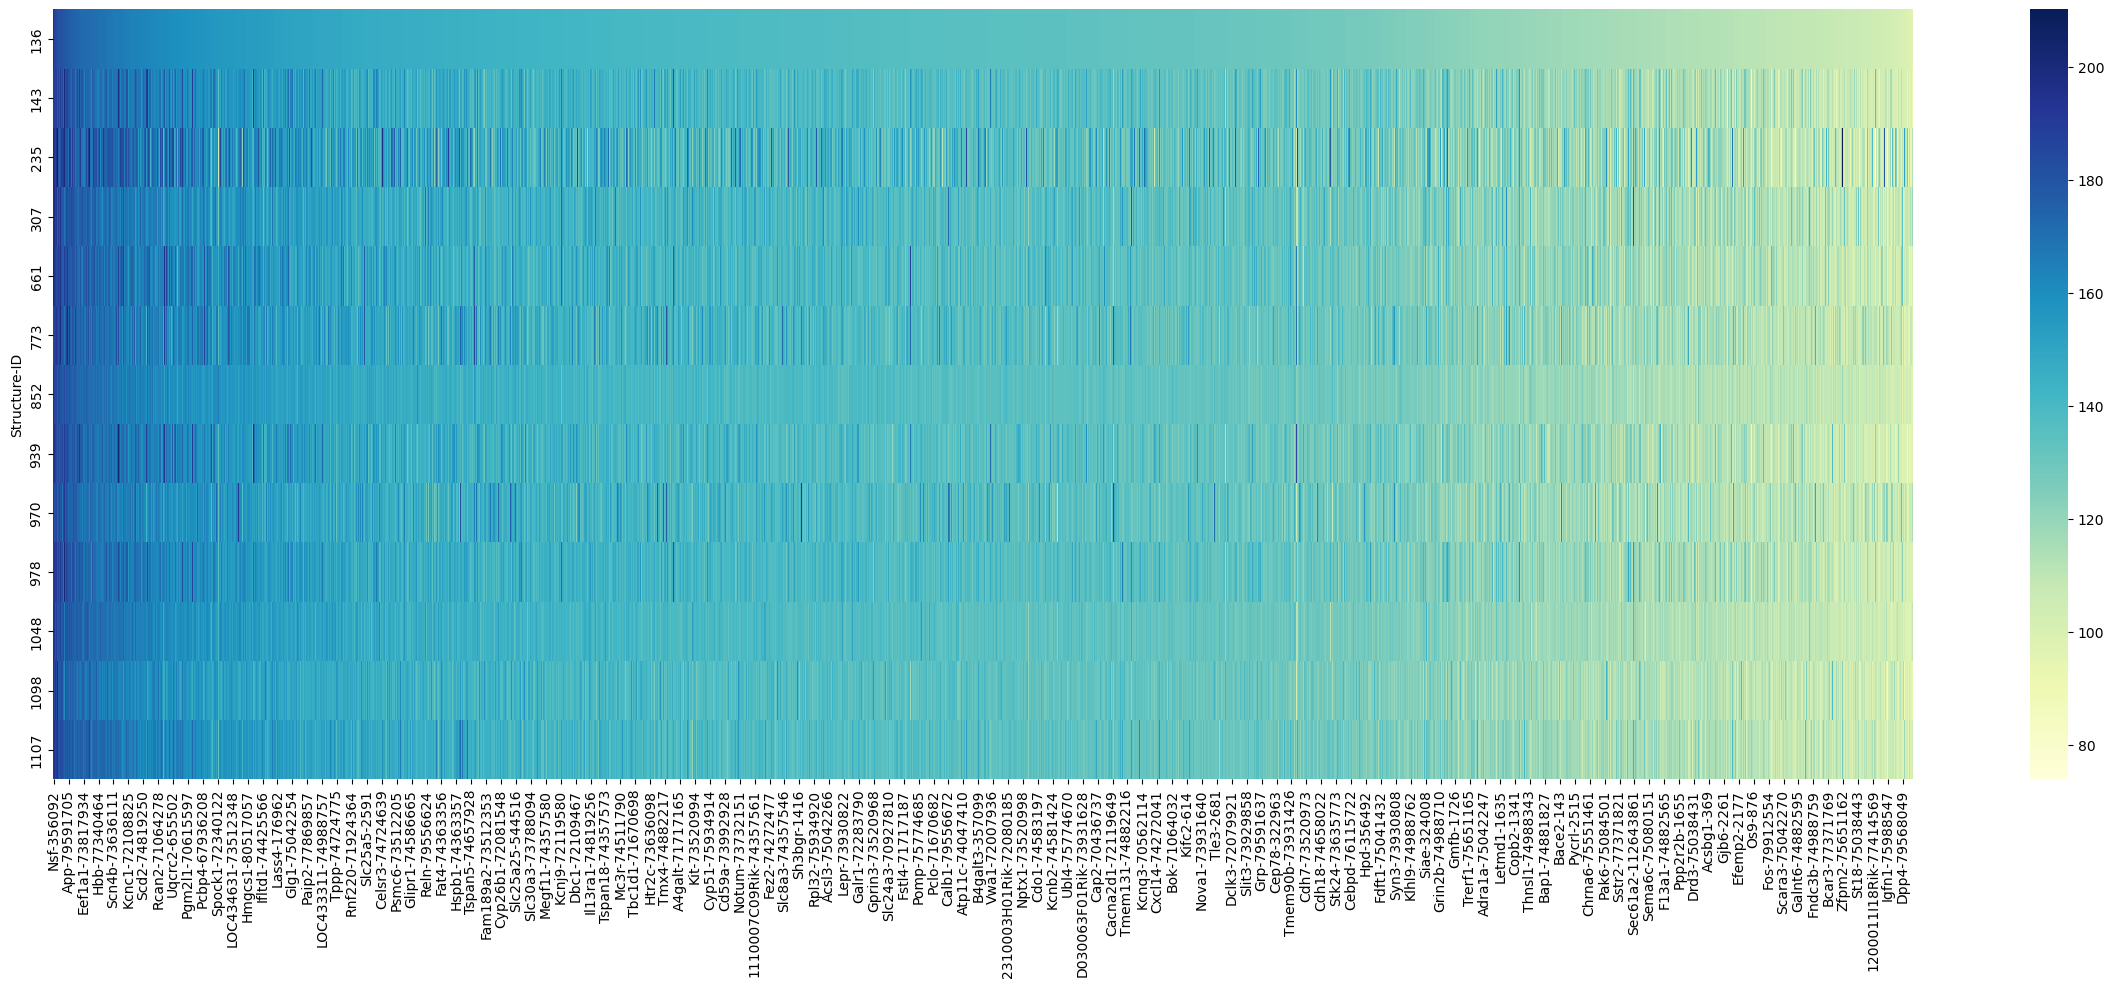

In [49]:
sort_mean_df = mean_df.sort_values(by=136,axis=1,ascending=False)

plt.subplots(figsize=(30,10))
# Create a custom colormap
custom_cmap = sns.color_palette("YlGnBu", as_cmap=True) #YlOrBr

#srt_mean_df = mean_df.iloc[np.argsort(mean_df.values, axis=1)]

# mean of the density for each gene with a heat map
sns.heatmap(sort_mean_df, cmap=custom_cmap)
plt.show()

### most influential genes for each structure ID (Mean of Intensity)

In [50]:
cutOffGene04.groupby('Structure-ID').mean().idxmax(axis=1)

Structure-ID
136           Nsf-356092
143     Slc18a3-73521822
235       Mmgt1-77414585
307           Gaa-356090
661           Nsf-356092
773        Nefl-73512198
852           Nsf-356092
939     Slc10a4-71670742
970          Kl-72119590
978     Slc18a3-73521822
1048          Nsf-356092
1098        Stac2-293472
1107        Stac2-293472
dtype: object

### Tof 5 Influential gene at cutoff 0.04

In [51]:
top5InfGene04 = round(cutOffGene04.groupby('Structure-ID').mean(), 3).apply(lambda x: x.nlargest(5), axis=1)
top5InfGene04

,8030498B09Rik-74958606,AI450948-71250311,Calcb-72338699,Cplx1-67752308,Ctsb-67779877,Disp2-74511801,F5-73992763,Foxp2-72079884,Gaa-356090,Gprasp1-70743888,...,Mmgt1-77414585,Nefh-74512048,Nefl-73512198,Nsf-356092,Pias2-356088,Prune2-77874616,Slc10a4-71670742,Slc18a3-73521822,Stac2-293472,Uchl1-79556674
Structure-ID,,,,,,,,,,,,,,,,,,,,,
136,186.089,NaN,NaN,184.129,NaN,NaN,NaN,NaN,188.275,NaN,...,NaN,NaN,NaN,194.692,NaN,NaN,NaN,NaN,182.939,NaN
143,NaN,NaN,191.366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,191.022,195.807,200.190,NaN,NaN
235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.118,NaN,NaN,...,210.144,NaN,NaN,200.546,202.348,NaN,NaN,NaN,206.728,NaN
307,NaN,NaN,NaN,192.679,NaN,NaN,NaN,NaN,198.336,189.296,...,NaN,NaN,NaN,196.087,NaN,NaN,NaN,NaN,NaN,192.002
661,NaN,195.151,NaN,NaN,NaN,NaN,NaN,NaN,195.318,NaN,...,NaN,NaN,191.236,200.046,NaN,NaN,NaN,NaN,NaN,195.975
773,NaN,189.911,NaN,192.337,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,191.748,199.525,NaN,NaN,NaN,NaN,NaN,NaN,197.407
852,184.748,NaN,NaN,184.542,185.467,NaN,NaN,NaN,188.201,NaN,...,NaN,NaN,NaN,194.423,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,192.441,NaN,NaN,NaN,192.498,NaN,NaN,196.051,NaN,...,NaN,NaN,NaN,NaN,NaN,195.967,201.294,NaN,NaN,NaN
970,NaN,NaN,NaN,185.609,NaN,NaN,191.767,NaN,NaN,NaN,...,NaN,NaN,NaN,190.238,NaN,NaN,NaN,191.539,NaN,NaN


In [52]:
colsTot = []
for i in top5InfGene04.columns:
    colsTot.append(i)

colsTot

['8030498B09Rik-74958606',
 'AI450948-71250311',
 'Calcb-72338699',
 'Cplx1-67752308',
 'Ctsb-67779877',
 'Disp2-74511801',
 'F5-73992763',
 'Foxp2-72079884',
 'Gaa-356090',
 'Gprasp1-70743888',
 'Kl-72119590',
 'Lgals1-70634417',
 'Mmgt1-77414585',
 'Nefh-74512048',
 'Nefl-73512198',
 'Nsf-356092',
 'Pias2-356088',
 'Prune2-77874616',
 'Slc10a4-71670742',
 'Slc18a3-73521822',
 'Stac2-293472',
 'Uchl1-79556674']

In [53]:
top5InfGene04.to_csv('Int_Top5InfGene04.csv', index=True)

In [54]:
top5InfGene04.iloc[0].nlargest(5).index.to_list()

['Nsf-356092',
 'Gaa-356090',
 '8030498B09Rik-74958606',
 'Cplx1-67752308',
 'Stac2-293472']

In [55]:
new04Mean_df = mean_df[colsTot]
new04Mean_df

,8030498B09Rik-74958606,AI450948-71250311,Calcb-72338699,Cplx1-67752308,Ctsb-67779877,Disp2-74511801,F5-73992763,Foxp2-72079884,Gaa-356090,Gprasp1-70743888,...,Mmgt1-77414585,Nefh-74512048,Nefl-73512198,Nsf-356092,Pias2-356088,Prune2-77874616,Slc10a4-71670742,Slc18a3-73521822,Stac2-293472,Uchl1-79556674
Structure-ID,,,,,,,,,,,,,,,,,,,,,
136,186.088840,160.832096,158.021157,184.128732,180.917924,172.408361,154.497236,134.560576,188.275298,181.595815,...,107.664279,176.133469,178.059835,194.691618,171.618066,153.773623,166.549636,179.116356,182.939114,180.538659
143,187.540857,177.004771,191.365821,188.979611,178.300979,188.515547,157.768990,137.466091,188.803910,186.072123,...,108.458447,179.346390,185.820206,188.448854,170.936711,191.022224,195.807363,200.190493,178.702154,190.074513
235,189.208330,159.605790,177.679350,197.868160,173.722370,180.553650,161.809270,205.118060,193.438800,180.352750,...,210.143590,192.460160,181.829830,200.546160,202.347900,140.187200,163.492970,199.388810,206.728160,179.695900
307,187.797248,151.672500,148.810955,192.678687,181.341732,174.390192,159.614370,146.842975,198.335772,189.296448,...,107.420987,181.422019,182.546874,196.087018,175.317068,141.052471,164.784713,167.642195,174.736595,192.002114
661,189.431805,195.151485,173.676640,184.457455,184.635598,169.167140,145.952060,134.076294,195.317585,189.023208,...,99.235969,177.233248,191.236164,200.046440,173.799181,149.012768,186.538482,189.107705,185.101822,195.974848
773,188.360493,189.910580,174.192194,192.336698,188.529573,170.937055,158.011578,137.646003,187.795017,181.392427,...,105.167335,191.748200,199.524866,186.744699,165.847856,148.258568,182.790679,169.530759,188.299065,197.406601
852,184.748312,150.957997,154.961832,184.542143,185.466995,172.861013,151.012789,135.029443,188.200993,182.100352,...,118.516291,180.783622,178.917237,194.423333,169.150886,155.964075,163.292396,182.837409,178.020639,179.136101
939,188.366895,192.441450,191.170577,184.752432,177.408017,192.498282,148.442646,137.372355,196.051012,184.873628,...,110.517499,176.755207,186.060518,191.652800,166.264113,195.967320,201.294208,191.472002,177.059303,182.394878
970,183.610270,154.094403,158.682325,185.608722,183.912238,171.318299,191.767169,135.078429,182.572716,180.563500,...,108.013185,176.834126,180.477220,190.238137,161.261672,154.548358,161.478016,191.538817,173.878207,180.128277


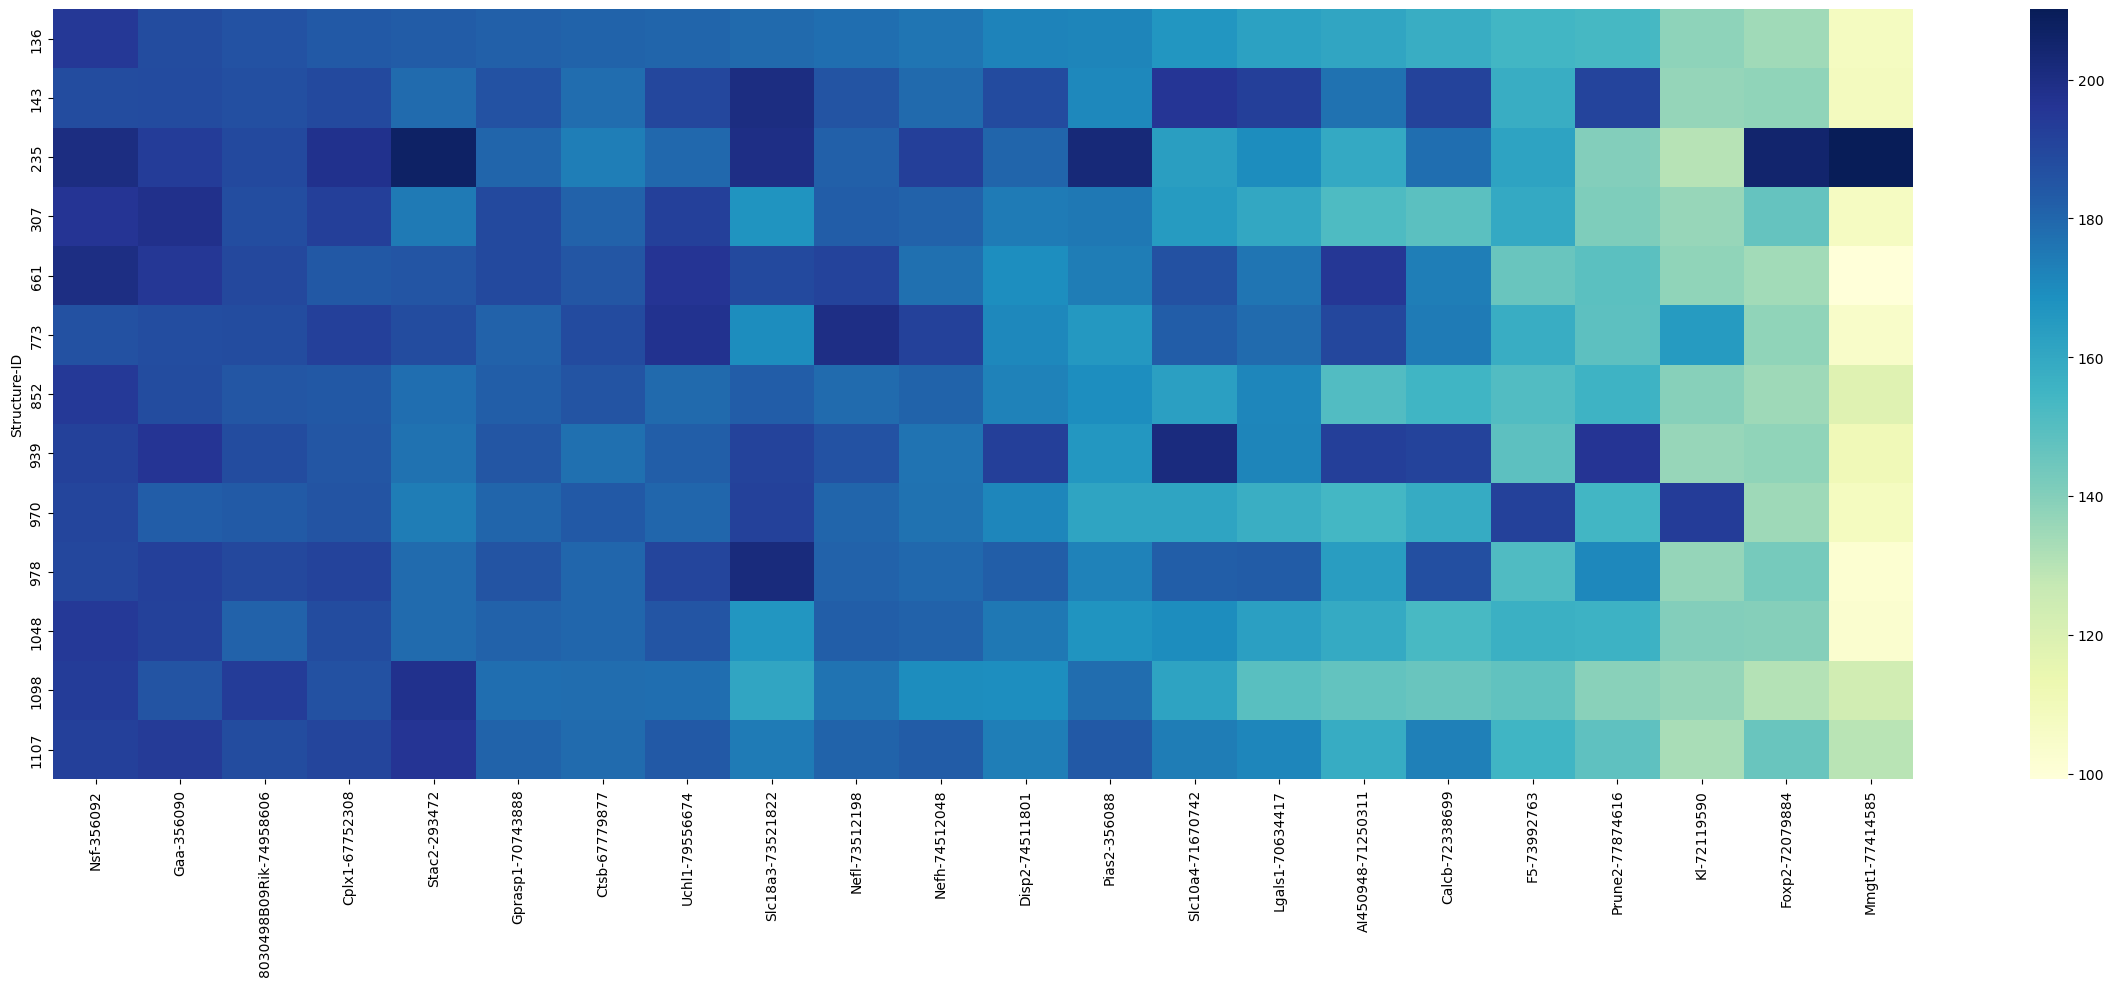

In [56]:
#top5InfGene04

sort_mean_df_tp5 = new04Mean_df.sort_values(by=136,axis=1,ascending=False)

plt.subplots(figsize=(30,10))
# Create a custom colormap
custom_cmap = sns.color_palette("YlGnBu", as_cmap=True) #YlOrBr

#srt_mean_df = mean_df.iloc[np.argsort(mean_df.values, axis=1)]

# mean of the density for each gene with a heat map
sns.heatmap(sort_mean_df_tp5, cmap=custom_cmap)
plt.show()

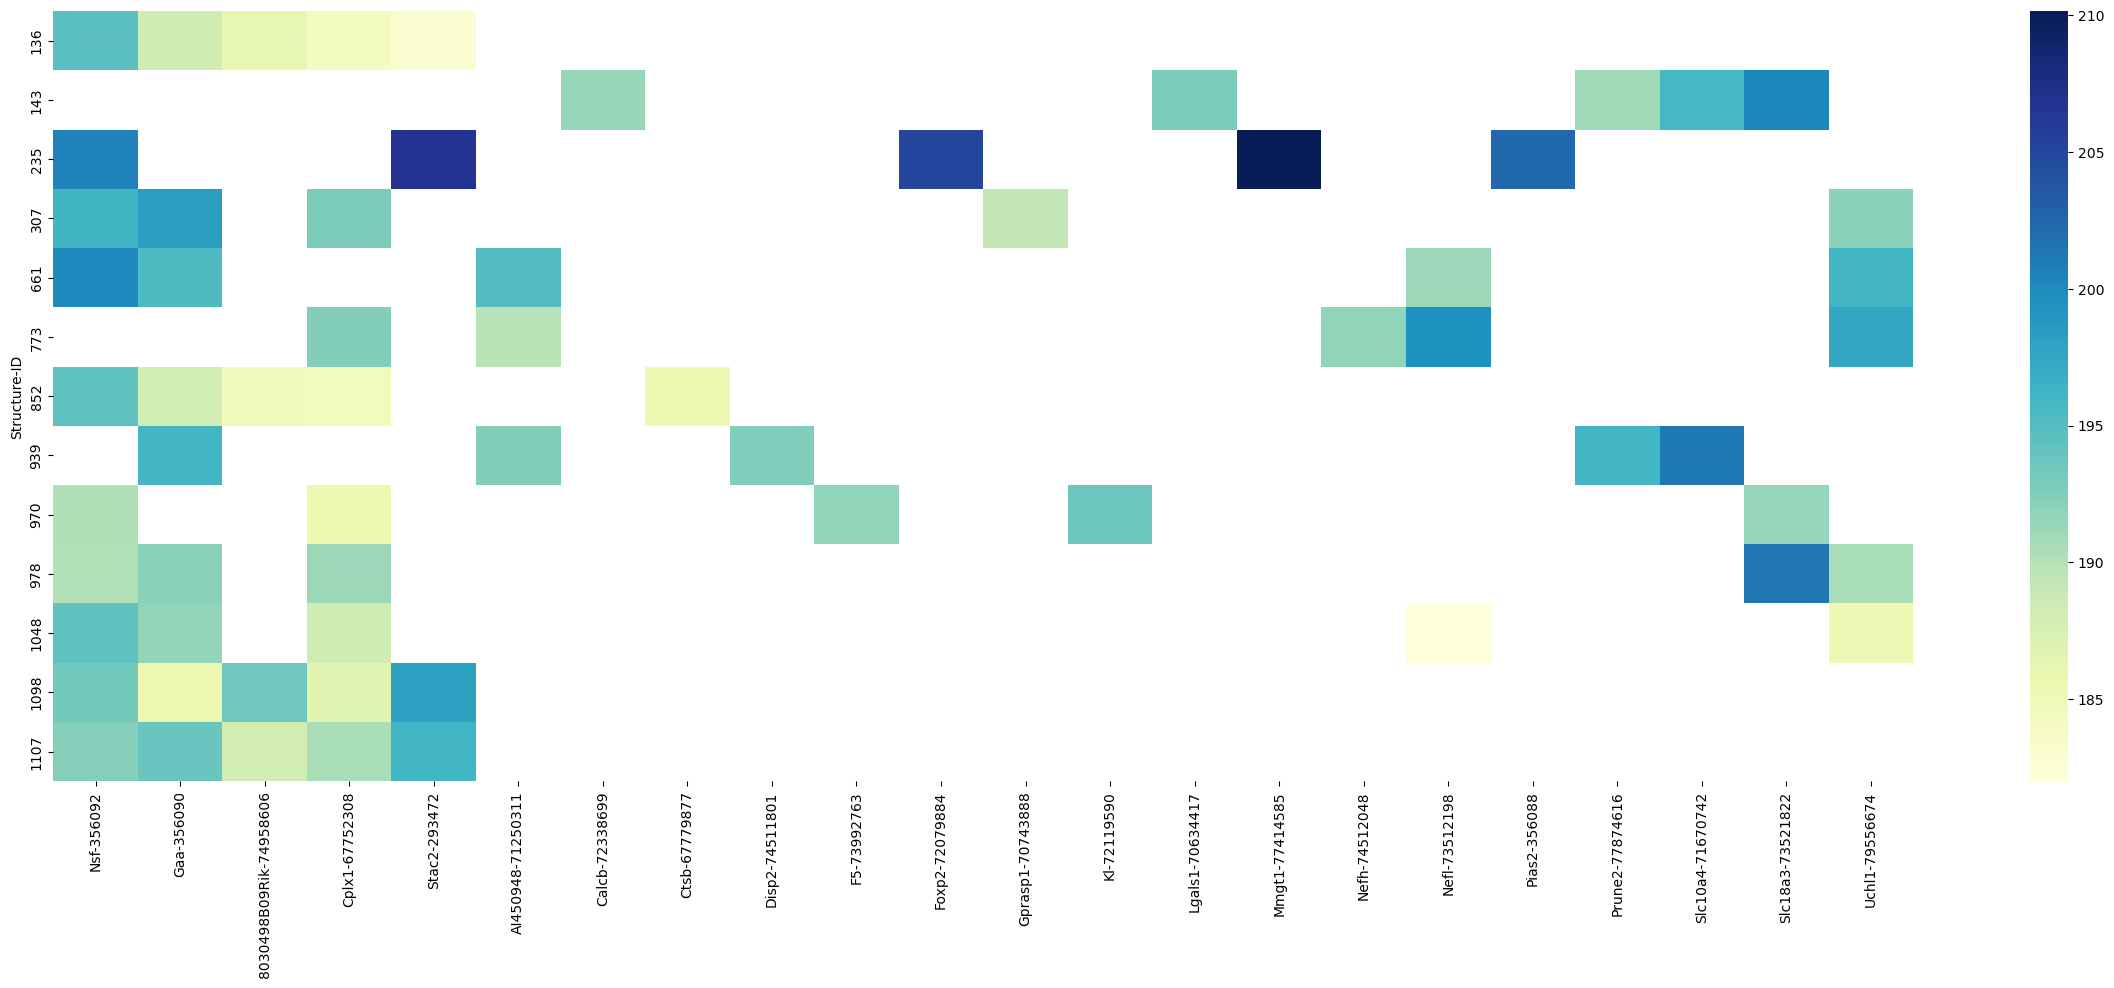

In [57]:
top5InfGene04

sort_top5 = top5InfGene04.sort_values(by=136,axis=1,ascending=False)

plt.subplots(figsize=(30,10))
# Create a custom colormap
custom_cmap = sns.color_palette("YlGnBu", as_cmap=True) #YlOrBr

#srt_mean_df = mean_df.iloc[np.argsort(mean_df.values, axis=1)]

# mean of the density for each gene with a heat map
sns.heatmap(sort_top5, cmap=custom_cmap)
plt.show()

In [58]:
sort_mean_df_tp5.iloc[0].sum()

3693.299788558405

In [75]:
sort_mean_df_tp5['Nsf-356092'] / sort_mean_df_tp5['Nsf-356092'].sum()

Structure-ID
136     0.077474
143     0.074990
235     0.079803
307     0.078029
661     0.079605
773     0.074311
852     0.077367
939     0.076265
970     0.075702
978     0.075638
1048    0.077334
1098    0.076963
1107    0.076519
Name: Nsf-356092, dtype: float64

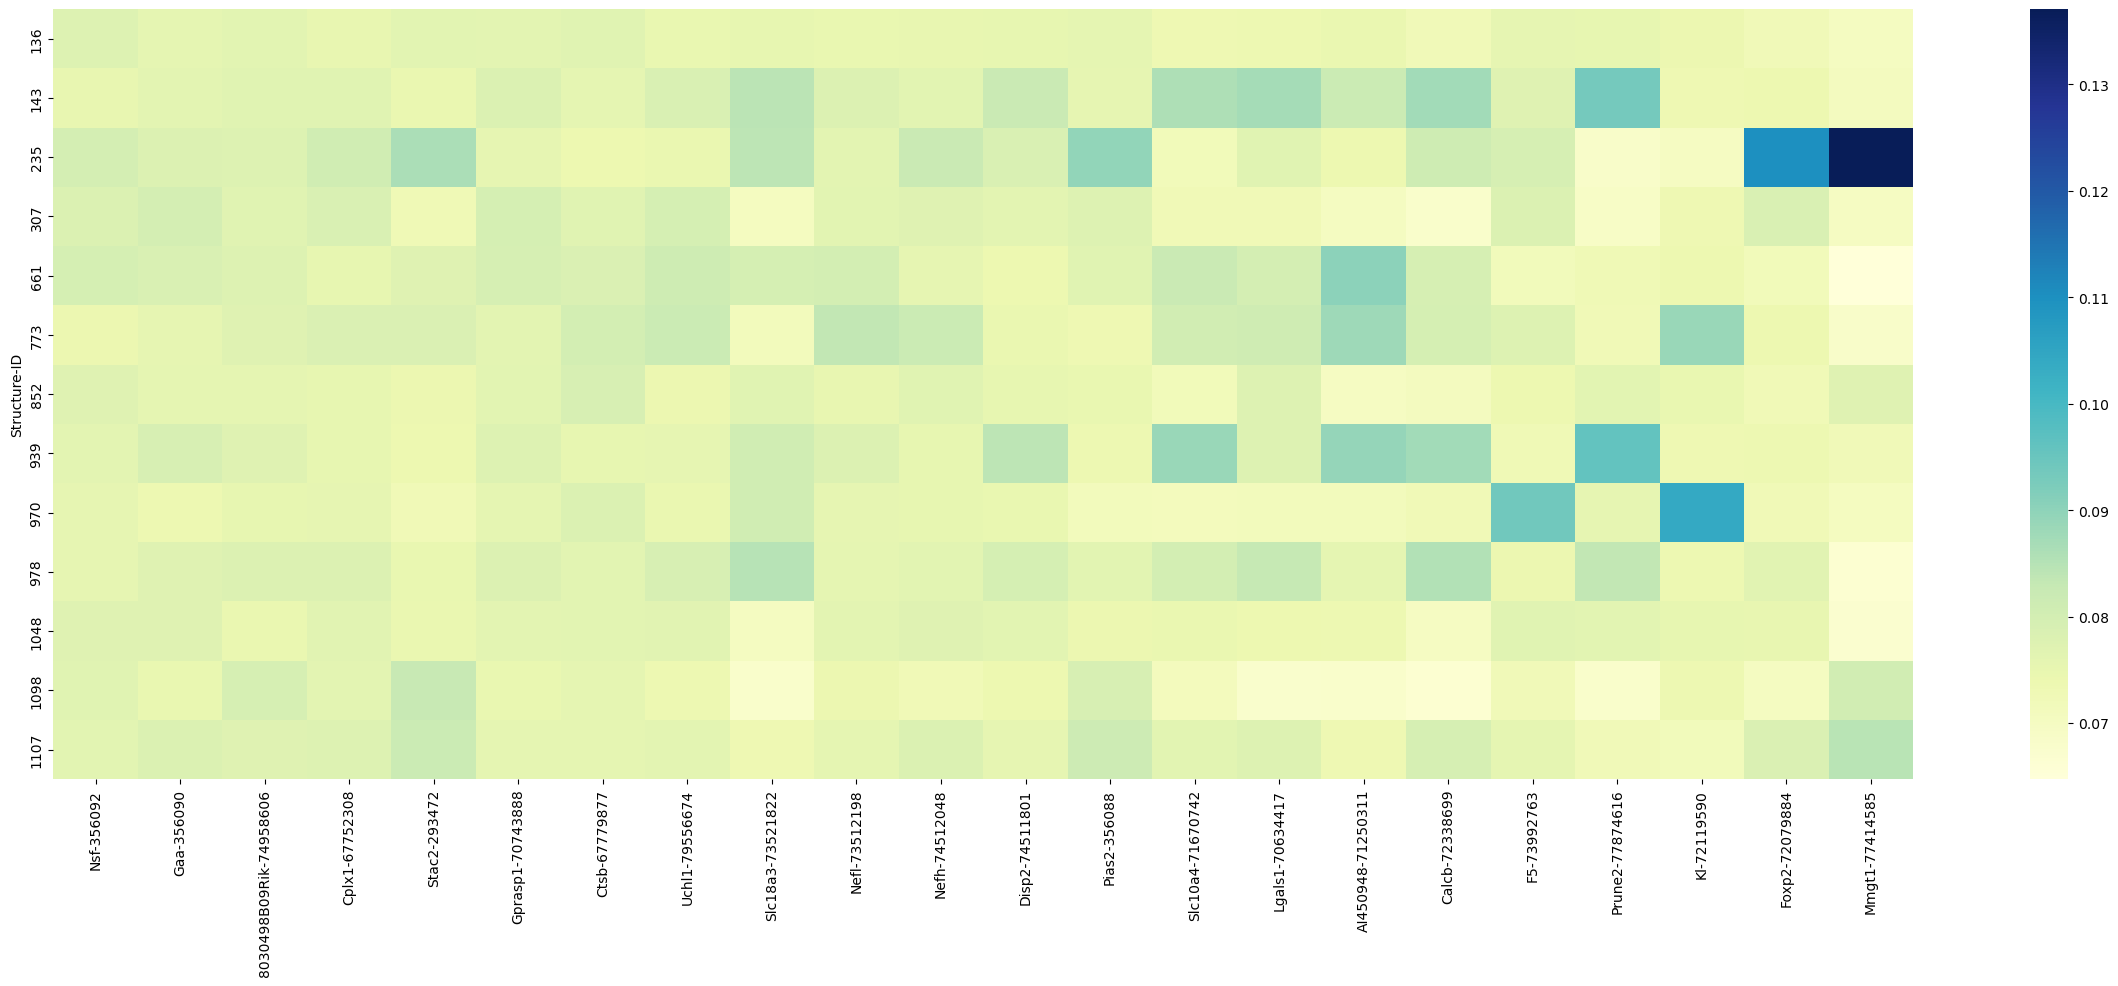

In [76]:
norm_data_tp5_col = sort_mean_df_tp5.copy()

for i in sort_mean_df_tp5.columns:
    norm_data_tp5_col[i] = norm_data_tp5_col[i] / norm_data_tp5_col[i].sum()
    
plt.subplots(figsize=(30,10))

#norm_data_tp5 = norm_data_tp5.sort_values(by=136,axis=1,ascending=False)

# Create a custom colormap
custom_cmap = sns.color_palette("YlGnBu", as_cmap=True) #YlOrBr

#srt_mean_df = mean_df.iloc[np.argsort(mean_df.values, axis=1)]

# mean of the density for each gene with a heat map
sns.heatmap(norm_data_tp5_col, cmap=custom_cmap)
plt.show()

In [59]:
# dataframe 
norm_data_tp5 = sort_mean_df_tp5.copy()

# normalize the data
for i in range(13):
    norm_data_tp5.iloc[i] = norm_data_tp5.iloc[i] / norm_data_tp5.iloc[i].sum()

       

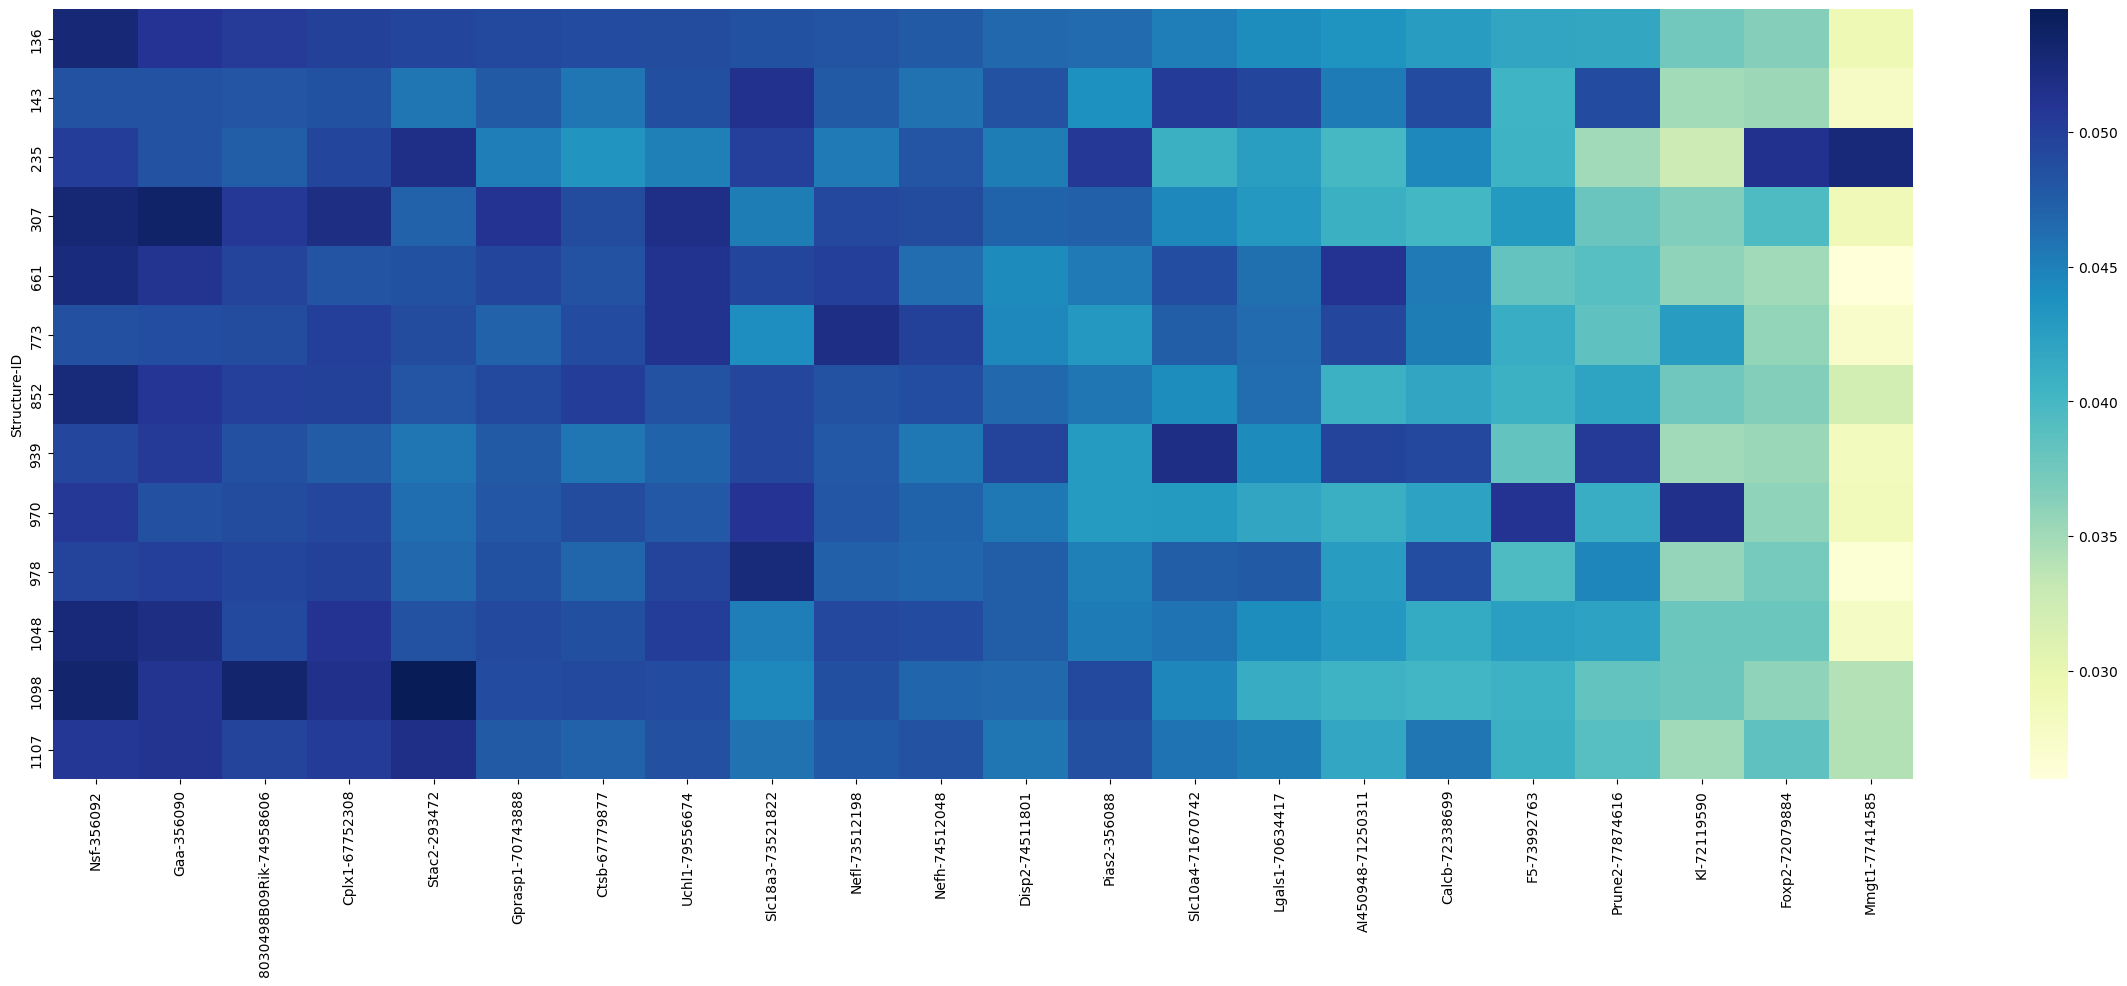

In [60]:
plt.subplots(figsize=(30,10))

#norm_data_tp5 = norm_data_tp5.sort_values(by=136,axis=1,ascending=False)

# Create a custom colormap
custom_cmap = sns.color_palette("YlGnBu", as_cmap=True) #YlOrBr

#srt_mean_df = mean_df.iloc[np.argsort(mean_df.values, axis=1)]

# mean of the density for each gene with a heat map
sns.heatmap(norm_data_tp5, cmap=custom_cmap)
plt.show()

In [61]:
# get all the coloums for each structure id  with mean intensity
# sort it by values and append it to a list of columns
colTot2 = []
for i in range(0,13):
    cols = round(cutOffGene04.groupby('Structure-ID').mean(), 3).iloc[i].sort_values(ascending= False).index.to_list()
    for c in cols:
        colTot2.append(c)


len(colTot2)



24323

In [62]:
# use the above list repeated to get the data frame
ht_map = mean_df[colTot2]
ht_map

,Nsf-356092,Gaa-356090,8030498B09Rik-74958606,Cplx1-67752308,Stac2-293472,Gprasp1-70743888,Ctsb-67779877,Uchl1-79556674,Heatr5b-70560265,Paf1-293469,...,Alkbh6-77414882,Cyhr1-77414565,Synj2bp-77414884,Cd33-75043153,Tmem64-77414589,2610017I09Rik-77280584,Alpk2-74988275,Nmbr-77332086,Runx2-79556626,Igfn1-75988547
Structure-ID,,,,,,,,,,,,,,,,,,,,,
136,194.691618,188.275298,186.088840,184.128732,182.939114,181.595815,180.917924,180.538659,180.291703,179.845234,...,102.208389,98.057267,110.352423,104.891043,100.757705,103.750982,105.138024,108.673355,98.989271,103.511326
143,188.448854,188.803910,187.540857,188.979611,178.702154,186.072123,178.300979,190.074513,178.390409,185.118480,...,100.771834,96.382027,97.766652,105.685691,102.419053,112.005299,118.211669,104.776643,102.473860,98.320681
235,200.546160,193.438800,189.208330,197.868160,206.728160,180.352750,173.722370,179.695900,190.848980,185.758820,...,90.673645,94.269580,90.806620,94.061420,103.005640,95.291070,101.285000,95.841370,93.981230,82.100204
307,196.087018,198.335772,187.797248,192.678687,174.736595,189.296448,181.341732,192.002114,179.998384,176.949661,...,108.233414,112.597249,101.851481,105.353821,98.303355,99.679907,109.804470,105.212595,106.232073,93.473122
661,200.046440,195.317585,189.431805,184.457455,185.101822,189.023208,184.635598,195.974848,178.886759,178.688546,...,104.594708,100.607974,134.419948,106.033262,100.110639,107.913372,102.915867,100.514027,103.047065,94.426514
773,186.744699,187.795017,188.360493,192.336698,188.299065,181.392427,188.529573,197.406601,178.939027,179.656052,...,105.285113,108.416169,103.269539,105.674791,111.763694,106.230531,99.720209,117.938999,98.381515,115.644815
852,194.423333,188.200993,184.748312,184.542143,178.020639,182.100352,185.466995,179.136101,180.632354,176.555028,...,107.333408,105.424130,111.949464,108.944415,107.140758,108.849630,109.980127,102.435441,100.888617,103.088664
939,191.652800,196.051012,188.366895,184.752432,177.059303,184.873628,177.408017,182.394878,179.831277,186.204052,...,98.498906,95.163012,95.648977,106.301903,98.846251,106.839869,109.148433,101.748731,102.396091,97.330949
970,190.238137,182.572716,183.610270,185.608722,173.878207,180.563500,183.912238,180.128277,181.250844,168.573828,...,109.736512,107.032948,104.029213,117.451986,111.077713,106.989938,102.746945,117.058984,97.079113,121.802199


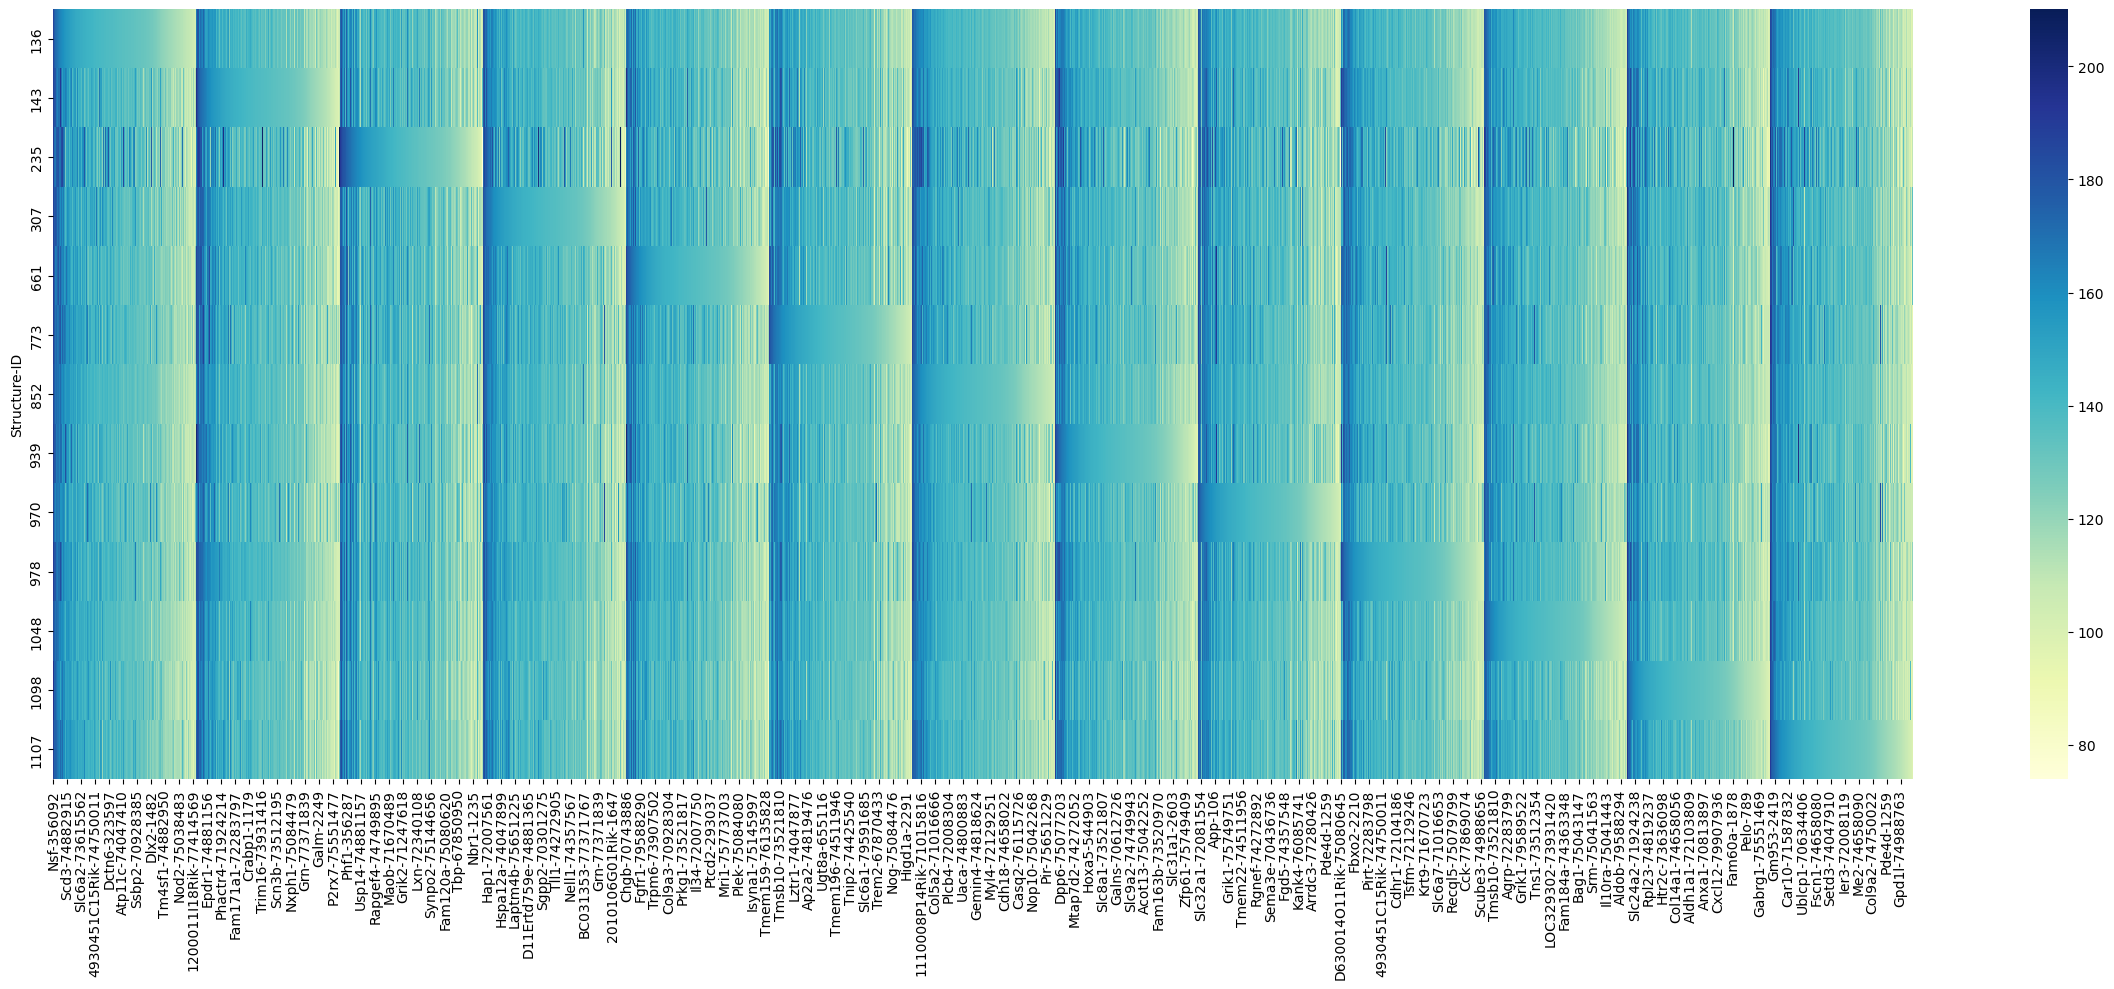

In [63]:
# show the heatmap of the above dataframe
plt.subplots(figsize=(30,10))
# Create a custom colormap
custom_cmap = sns.color_palette("YlGnBu", as_cmap=True) #YlOrBr

#srt_mean_df = mean_df.iloc[np.argsort(mean_df.values, axis=1)]

# mean of the density for each gene with a heat map
sns.heatmap(ht_map, cmap=custom_cmap)
plt.show()

In [64]:
# create a dataframe to have the important genes
tp5ImpGene_df = pd.DataFrame(columns=['StrID', 'Top5ImpGene'])

# loop through the columns to create a dataframe of important genes
iloc = 0
for strId in top5InfGene04.index:
    # get the 5 gene name having max impact
    fet = top5InfGene04.iloc[iloc].nlargest(5).index.to_list()
    
    # create the datafame
    df = pd.DataFrame({'StrID': [strId],
                        'Top5ImpGene': [fet]})
    
    # concat the data to the dataframe
    tp5ImpGene_df = pd.concat([tp5ImpGene_df, df], ignore_index=True)
    iloc += 1
                            
tp5ImpGene_df

,StrID,Top5ImpGene
0,136,"[Nsf-356092, Gaa-356090, 8030498B09Rik-7495860..."
1,143,"[Slc18a3-73521822, Slc10a4-71670742, Lgals1-70..."
2,235,"[Mmgt1-77414585, Stac2-293472, Foxp2-72079884,..."
3,307,"[Gaa-356090, Nsf-356092, Cplx1-67752308, Uchl1..."
4,661,"[Nsf-356092, Uchl1-79556674, Gaa-356090, AI450..."
5,773,"[Nefl-73512198, Uchl1-79556674, Cplx1-67752308..."
6,852,"[Nsf-356092, Gaa-356090, Ctsb-67779877, 803049..."
7,939,"[Slc10a4-71670742, Gaa-356090, Prune2-77874616..."
8,970,"[Kl-72119590, F5-73992763, Slc18a3-73521822, N..."
9,978,"[Slc18a3-73521822, Gaa-356090, Cplx1-67752308,..."


In [65]:
#tp5ImpGene_df.to_csv('Int_Top5InfGene04.csv', index=False)

In [66]:
noCutGene = iCorReduc.copy()

In [67]:
noCutGene['Structure-ID'] = intCoral['Structure-ID']

In [68]:
noCutGene.groupby('Structure-ID').mean().idxmax(axis=1)

Structure-ID
136       Eno2-112197625
143     Slc18a3-73521822
235       Ptprt-72008491
307       Eno2-112197625
661       Eno2-112197625
773        Nefl-73512198
852       Eno2-112197625
939     Slc10a4-71670742
970          Kl-72119590
978     Slc18a3-73521822
1048      Eno2-112197625
1098        Stac2-293472
1107      Eno2-112197625
dtype: object